In [1]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Location = r'Train.csv'
df = pd.read_csv(Location)
Lables =r'Labels.csv'
df_targets = pd.read_csv(Lables)

In [2]:
df_joined = pd.concat([df, df_targets.status_group], axis=1, join_axes=[df.index])

In [3]:
df.shape

(59400, 40)

In [4]:
df_targets.shape

(59400, 2)

In [5]:
df_joined.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0       3/14/11         Roman        1390         Roman   
1   8776         0.0        3/6/13       Grumeti        1399       GRUMETI   
2  34310        25.0       2/25/13  Lottery Club         686  World vision   
3  67743         0.0       1/28/13        Unicef         263        UNICEF   
4  19728         0.0       7/13/11   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private       ...        \
0  34.938093  -9.856322                  none            0       ...         
1  34.698766  -2.147466              Zahanati            0       ...         
2  37.460664  -3.821329           Kwa Mahundi            0       ...         
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0       ...         
4  31.130847  -1.825359               Shuleni            0       ...         

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type source_class  \
0                spring                spring  groundwater   
1  rainwater harvesting  rainwater harvesting      surface   
2                   dam                   dam      surface   
3           machine dbh              borehole  groundwater   
4  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group    status_group  
0           communal standpipe    communal standpipe      functional  
1           communal standpipe    communal standpipe      functional  
2  communal standpipe multiple    communal standpipe      functional  
3  communal standpipe multiple    communal standpipe  non functional  
4           communal standpipe    communal standpipe      functional  

[5 rows x 41 columns]

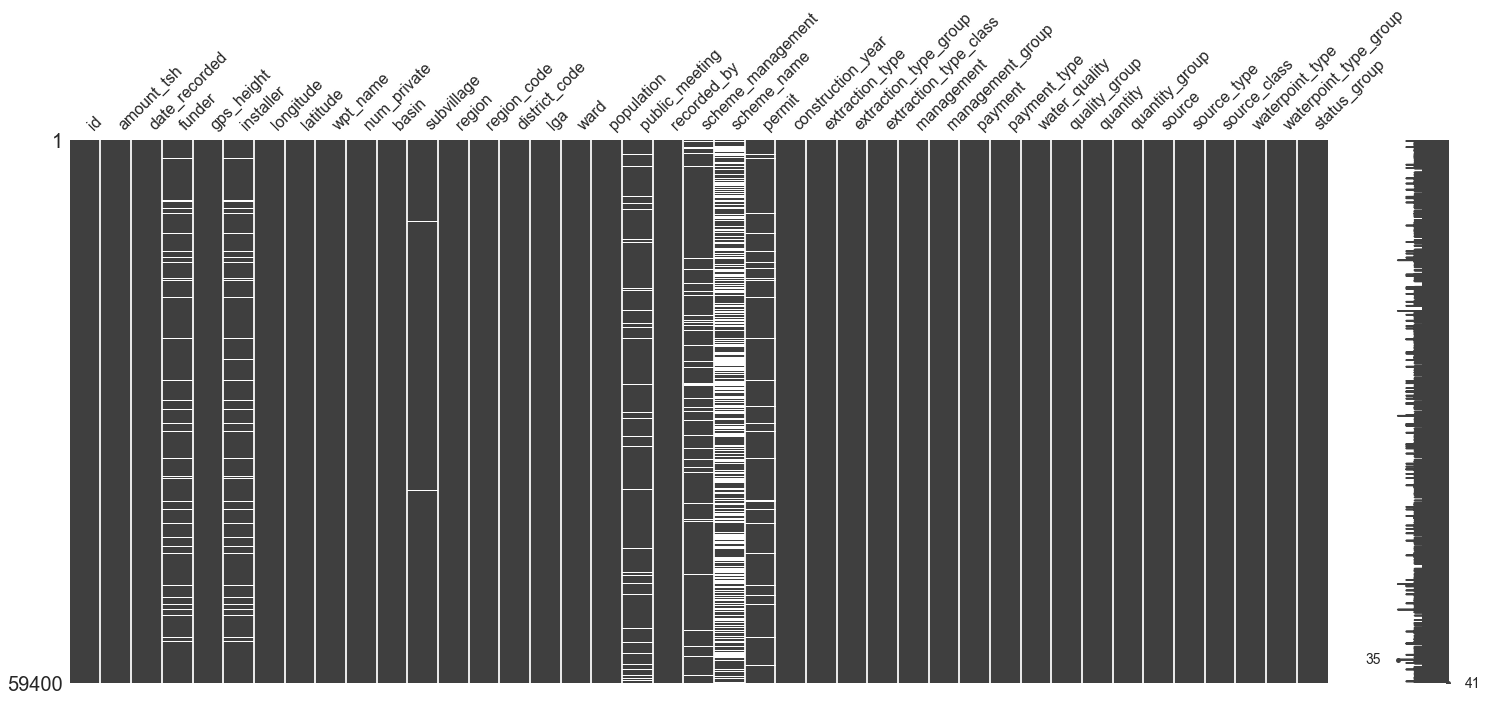

In [18]:
import missingno as msno

msno.matrix(df_joined.sample(59400))

There are missing values in the following features: funder,installer,subvillage,public_meeting,scheme_management,scheme_name,and permit

In [19]:
# mark zero values as missing 
df_joined[['funder','installer']] = df_joined[['funder','installer']].replace(np.NaN, 'missing')

In [20]:
# mark zero values as missing
df_joined[['subvillage']] = df_joined[['subvillage']].replace(np.NaN, 'missing')

In [21]:
# mark zero values as missing
df_joined[['public_meeting','scheme_management','scheme_name','permit']] = df_joined[['public_meeting','scheme_management','scheme_name','permit']].replace(np.NaN, 'missing')

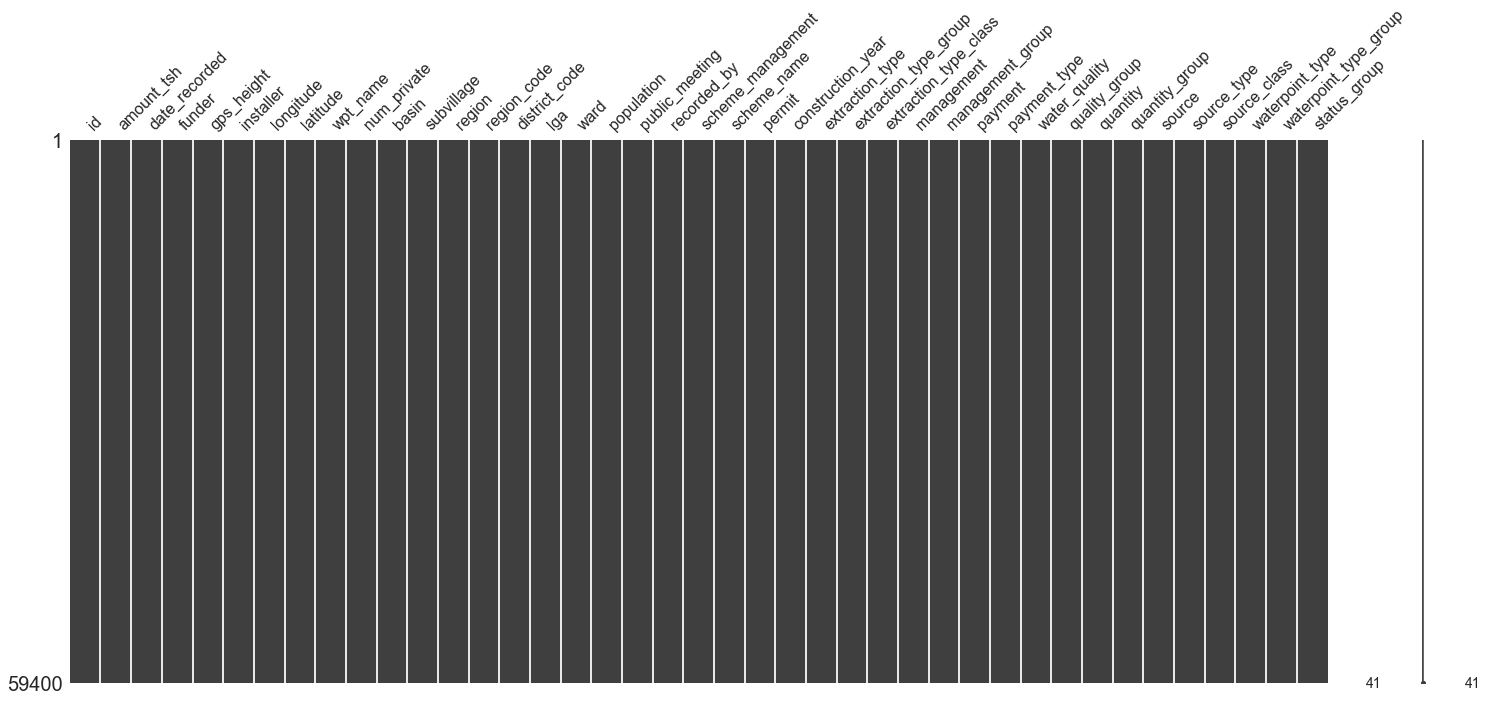

In [22]:
import missingno as msno

msno.matrix(df_joined.sample(59400))

In [23]:
df_joined.to_csv('df_joined_imputed.csv', index=False)

In [64]:
df_count = df_joined.groupby(['status_group'],as_index=False, sort=False)['counts'].count()

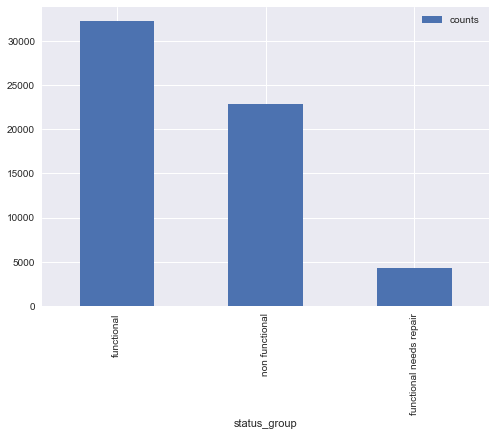

In [69]:
df_count.plot(x='status_group',y='counts',kind='bar',)
plt.savefig('count.png')

In [70]:
df_count

status_group  counts
0               functional   32259
1           non functional   22824
2  functional needs repair    4317

In [32]:
df_joined.subvillage.value_counts()

Madukani             508
Shuleni              506
Majengo              502
Kati                 373
Mtakuja              262
Sokoni               232
M                    187
Muungano             172
Mbuyuni              164
Mlimani              152
Songambele           147
Msikitini            134
Miembeni             134
1                    132
Kibaoni              114
Kanisani             111
Mapinduzi            109
I                    109
Mjini                108
Mjimwema             108
Mkwajuni             104
Mwenge               102
Mabatini              98
Azimio                98
Mbugani               95
Mission               95
Bwawani               91
Bondeni               90
Chang'Ombe            88
Zahanati              86
                    ... 
Nzengelangulu          1
Msinjewe               1
Lolimotonyi            1
Songambele Kusini      1
Nyagwirogwe            1
Ndalilo B              1
Kifuka                 1
Kwigina                1
Masunkune B            1


In [29]:
df_joined.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [24]:
df_joined['counts']=1

In [25]:
df_joined.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year   counts  
count       59400.000000  59400.0  
mean         1300.652475      1.0  
std           951.620547      0.0  
min             0.000000      1.0  
25%             0.000000      1.0  
50%          1986.000000      1.0  
75%          2004.000000      1.0  
max          2013.000000      1.0

In [26]:
df_agg = df_joined.groupby(['funder','status_group'],as_index=False, sort=False)['counts'].count()

In [27]:
df_agg.head()

funder    status_group  counts
0         Roman      functional     226
1       Grumeti      functional      43
2  Lottery Club      functional       8
3        Unicef  non functional     358
4   Action In A      functional       1

In [28]:
funder_order=df_agg.sort_values(['funder','counts'], ascending=False)

In [29]:
funder_order

funder             status_group  counts
29                        missing               functional    1981
37                        missing           non functional    1217
130                       missing  functional needs repair     437
1851          Zingibali Secondary               functional       1
2220                      Zinduka               functional       1
1361           Zao Water Spring X           non functional       1
2360             Zao Water Spring               functional       3
2050                          Zao           non functional       1
907               Zaburi And Neig               functional       1
1450                        Zaben               functional       2
513               Yasini Selemani           non functional       1
2670                       Yasini           non functional       1
1875                   Yasi Naini               functional       1
1986                        Yaole           non functional       1
2740                  Wwf / Fores           non functional       1
702                           Wwf               functional      18
1234                          Wwf           non functional       8
104                           Wvt               functional     112
314                           Wvt  functional needs repair      37
1203                          Wvt           non functional       9
1044                          Wvc               functional       4
1316                  Wug And Ded               functional       1
1522                  Wua And Ded               functional       1
2488                  Wua And Ded           non functional       1
295                           Wua               functional     107
1098                          Wua           non functional      14
2423                         Wssp           non functional       2
1149                         Wssp               functional       1
1808                         Wspd               functional       2
597                    Wsdp & Sdg               functional       2
...                           ...                      ...     ...
947                      Act Mara               functional       1
1670                          Act               functional       1
384                          Acra               functional      46
1900                    Acord Ngo           non functional       1
2306                    Acord Ngo  functional needs repair       1
835                         Acord           non functional       2
2267                        Acord               functional       1
827                   Aco/germany               functional      12
1356                  Aco/germany  functional needs repair       1
2147                          Abs               functional       1
1717                        Abood           non functional       2
1628                        Abdul           non functional       1
2174                       Abddwe               functional       1
2113                       Abdala           non functional       1
561                           Abd               functional       5
1292                          Abd           non functional       2
1981  Abc-ihushi Development Cent           non functional       1
202                        Abasia               functional      36
1589                       Abasia           non functional       5
1340                       Abasia  functional needs repair       2
2228                      Abas Ka               functional       1
600                           Aar               functional      22
1633                          Aar           non functional       7
751                           Aar  functional needs repair       4
518                  A/co Germany           non functional       7
748                  A/co Germany               functional       7
2551                 A/co Germany  functional needs repair       1
90                              0               functional     445
95     

In [30]:
funder_order=df_agg.apply(lambda x: x.sort_values(ascending=False))

In [31]:
funder_order

funder             status_group  counts
0                           Roman               functional     226
1                         Grumeti               functional      43
2                    Lottery Club               functional       8
3                          Unicef           non functional     358
4                     Action In A               functional       1
5             Mkinga Distric Coun               functional     121
6                            Dwsp           non functional     215
7                           Rwssp           non functional     460
8                        Wateraid           non functional      73
9                     Isingiro Ho               functional       8
10                        Private               functional     234
11                         Danida               functional    1713
12                   World Vision               functional     743
13        Lawatefuka Water Supply               functional     168
14                          Biore               functional      27
15                          Rudep               functional     131
16                         Hesawa  functional needs repair     232
17                            Twe               functional      87
18                           Dwsp               functional     371
19                         Unicef  functional needs repair      99
20                            Isf               functional     142
21       African Development Bank               functional      26
22         Government Of Tanzania  functional needs repair     701
23                         Sobodo               functional       1
24                         Hesawa               functional     936
25         Government Of Tanzania           non functional    4663
26                          Water               functional     258
27             Private Individual               functional     690
28                           Undp               functional      65
29                        missing               functional    1981
...                           ...                      ...     ...
2780      Compasion International               functional       1
2781                      Muivaru               functional       1
2782                    Raurensia               functional       1
2783         Private Institutions               functional       1
2784                        Ngumi               functional       1
2785                      Kauzeni               functional       1
2786                      Konoike  functional needs repair       1
2787                       Lowasa           non functional       1
2788                         Juma               functional       1
2789                  Banca Reale           non functional       1
2790                       Bruder  functional needs repair       1
2791                 Peter Mayiro               functional       1
2792               Muslim Society           non functional       1
2793                          Dgv           non functional       1
2794            People From Japan               functional       1
2795        Upendo Primary School               functional       1
2796                        Sipdo           non functional       1
2797                      Hongoli           non functional       1
2798  Resolute Mininggolden Pride               functional       1
2799             Norad/government               functional       1
2800                         Tove               functional       1
2801                   Nerthlands           non functional       1
2802               Nazalet Church               functional       1
2803         Scharnhorstgymnasium               functional       1
2804               Wanginyi Water               functional       1
2805                         Cida               functional       1
2806          Dwe/anglican Church           non functional       1
2807                         Dina               functional       1
2808   

In [32]:
df_agg

funder             status_group  counts
0                           Roman               functional     226
1                         Grumeti               functional      43
2                    Lottery Club               functional       8
3                          Unicef           non functional     358
4                     Action In A               functional       1
5             Mkinga Distric Coun               functional     121
6                            Dwsp           non functional     215
7                           Rwssp           non functional     460
8                        Wateraid           non functional      73
9                     Isingiro Ho               functional       8
10                        Private               functional     234
11                         Danida               functional    1713
12                   World Vision               functional     743
13        Lawatefuka Water Supply               functional     168
14                          Biore               functional      27
15                          Rudep               functional     131
16                         Hesawa  functional needs repair     232
17                            Twe               functional      87
18                           Dwsp               functional     371
19                         Unicef  functional needs repair      99
20                            Isf               functional     142
21       African Development Bank               functional      26
22         Government Of Tanzania  functional needs repair     701
23                         Sobodo               functional       1
24                         Hesawa               functional     936
25         Government Of Tanzania           non functional    4663
26                          Water               functional     258
27             Private Individual               functional     690
28                           Undp               functional      65
29                        missing               functional    1981
...                           ...                      ...     ...
2780      Compasion International               functional       1
2781                      Muivaru               functional       1
2782                    Raurensia               functional       1
2783         Private Institutions               functional       1
2784                        Ngumi               functional       1
2785                      Kauzeni               functional       1
2786                      Konoike  functional needs repair       1
2787                       Lowasa           non functional       1
2788                         Juma               functional       1
2789                  Banca Reale           non functional       1
2790                       Bruder  functional needs repair       1
2791                 Peter Mayiro               functional       1
2792               Muslim Society           non functional       1
2793                          Dgv           non functional       1
2794            People From Japan               functional       1
2795        Upendo Primary School               functional       1
2796                        Sipdo           non functional       1
2797                      Hongoli           non functional       1
2798  Resolute Mininggolden Pride               functional       1
2799             Norad/government               functional       1
2800                         Tove               functional       1
2801                   Nerthlands           non functional       1
2802               Nazalet Church               functional       1
2803         Scharnhorstgymnasium               functional       1
2804               Wanginyi Water               functional       1
2805                         Cida               functional       1
2806          Dwe/anglican Church           non functional       1
2807                         Dina               functional       1
2808   

In [ ]:
g = df_agg['counts'].groupby(level=1, group_keys=True)

In [ ]:
g.head()

In [33]:
colors = ['g', 'y', 'r']

(0, 500)

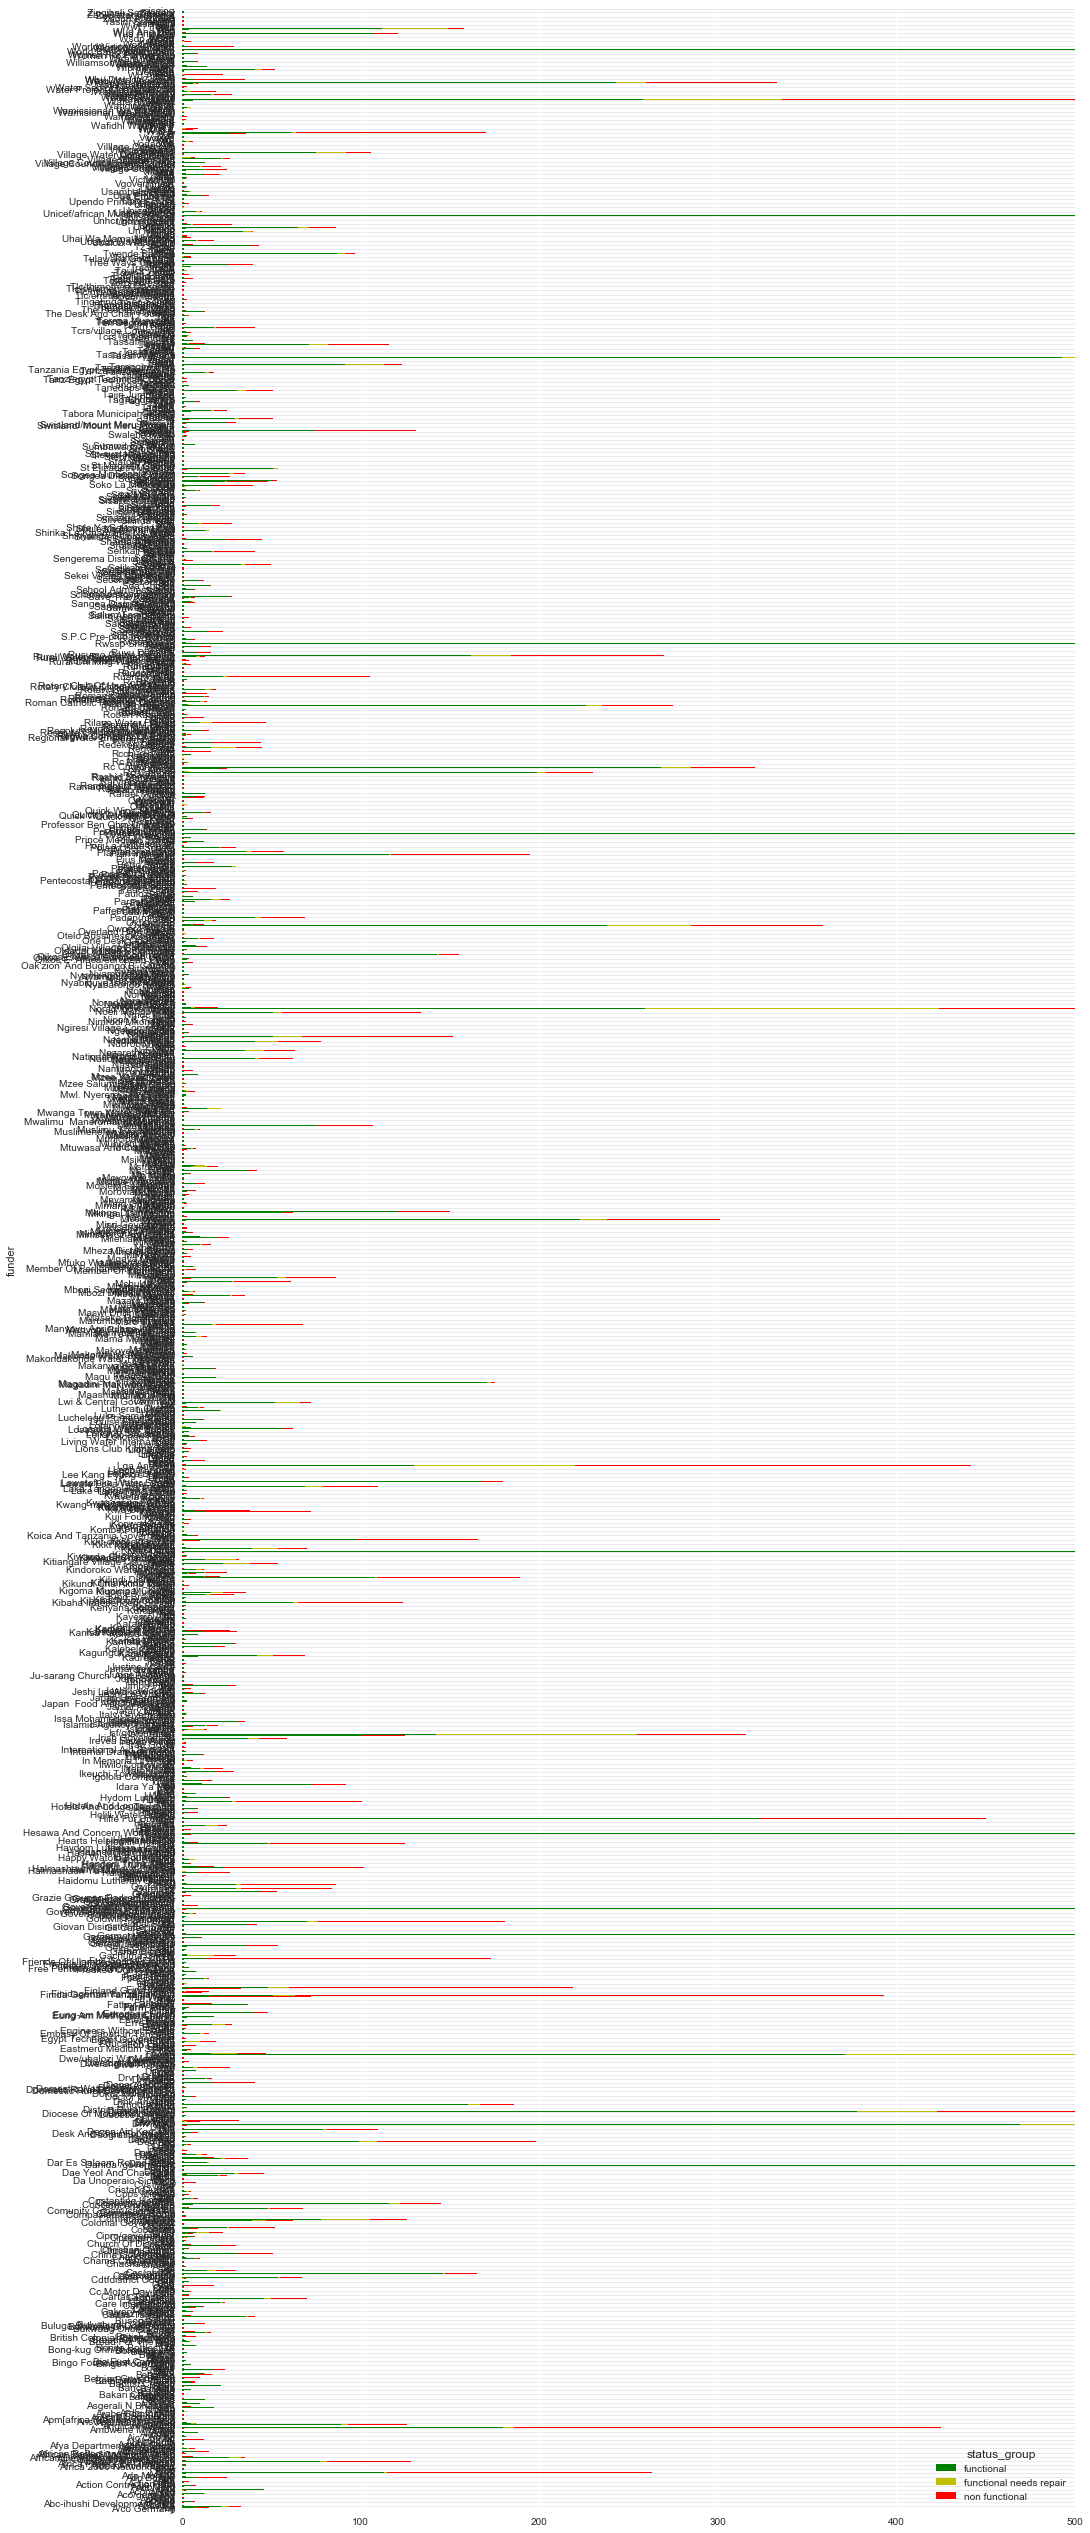

In [34]:
df_joined.groupby(['funder', 'status_group']).size().unstack().plot(kind='barh', stacked=True, color = colors,figsize=(16,46))
plt.xlim(0, 500)

(0, 500)

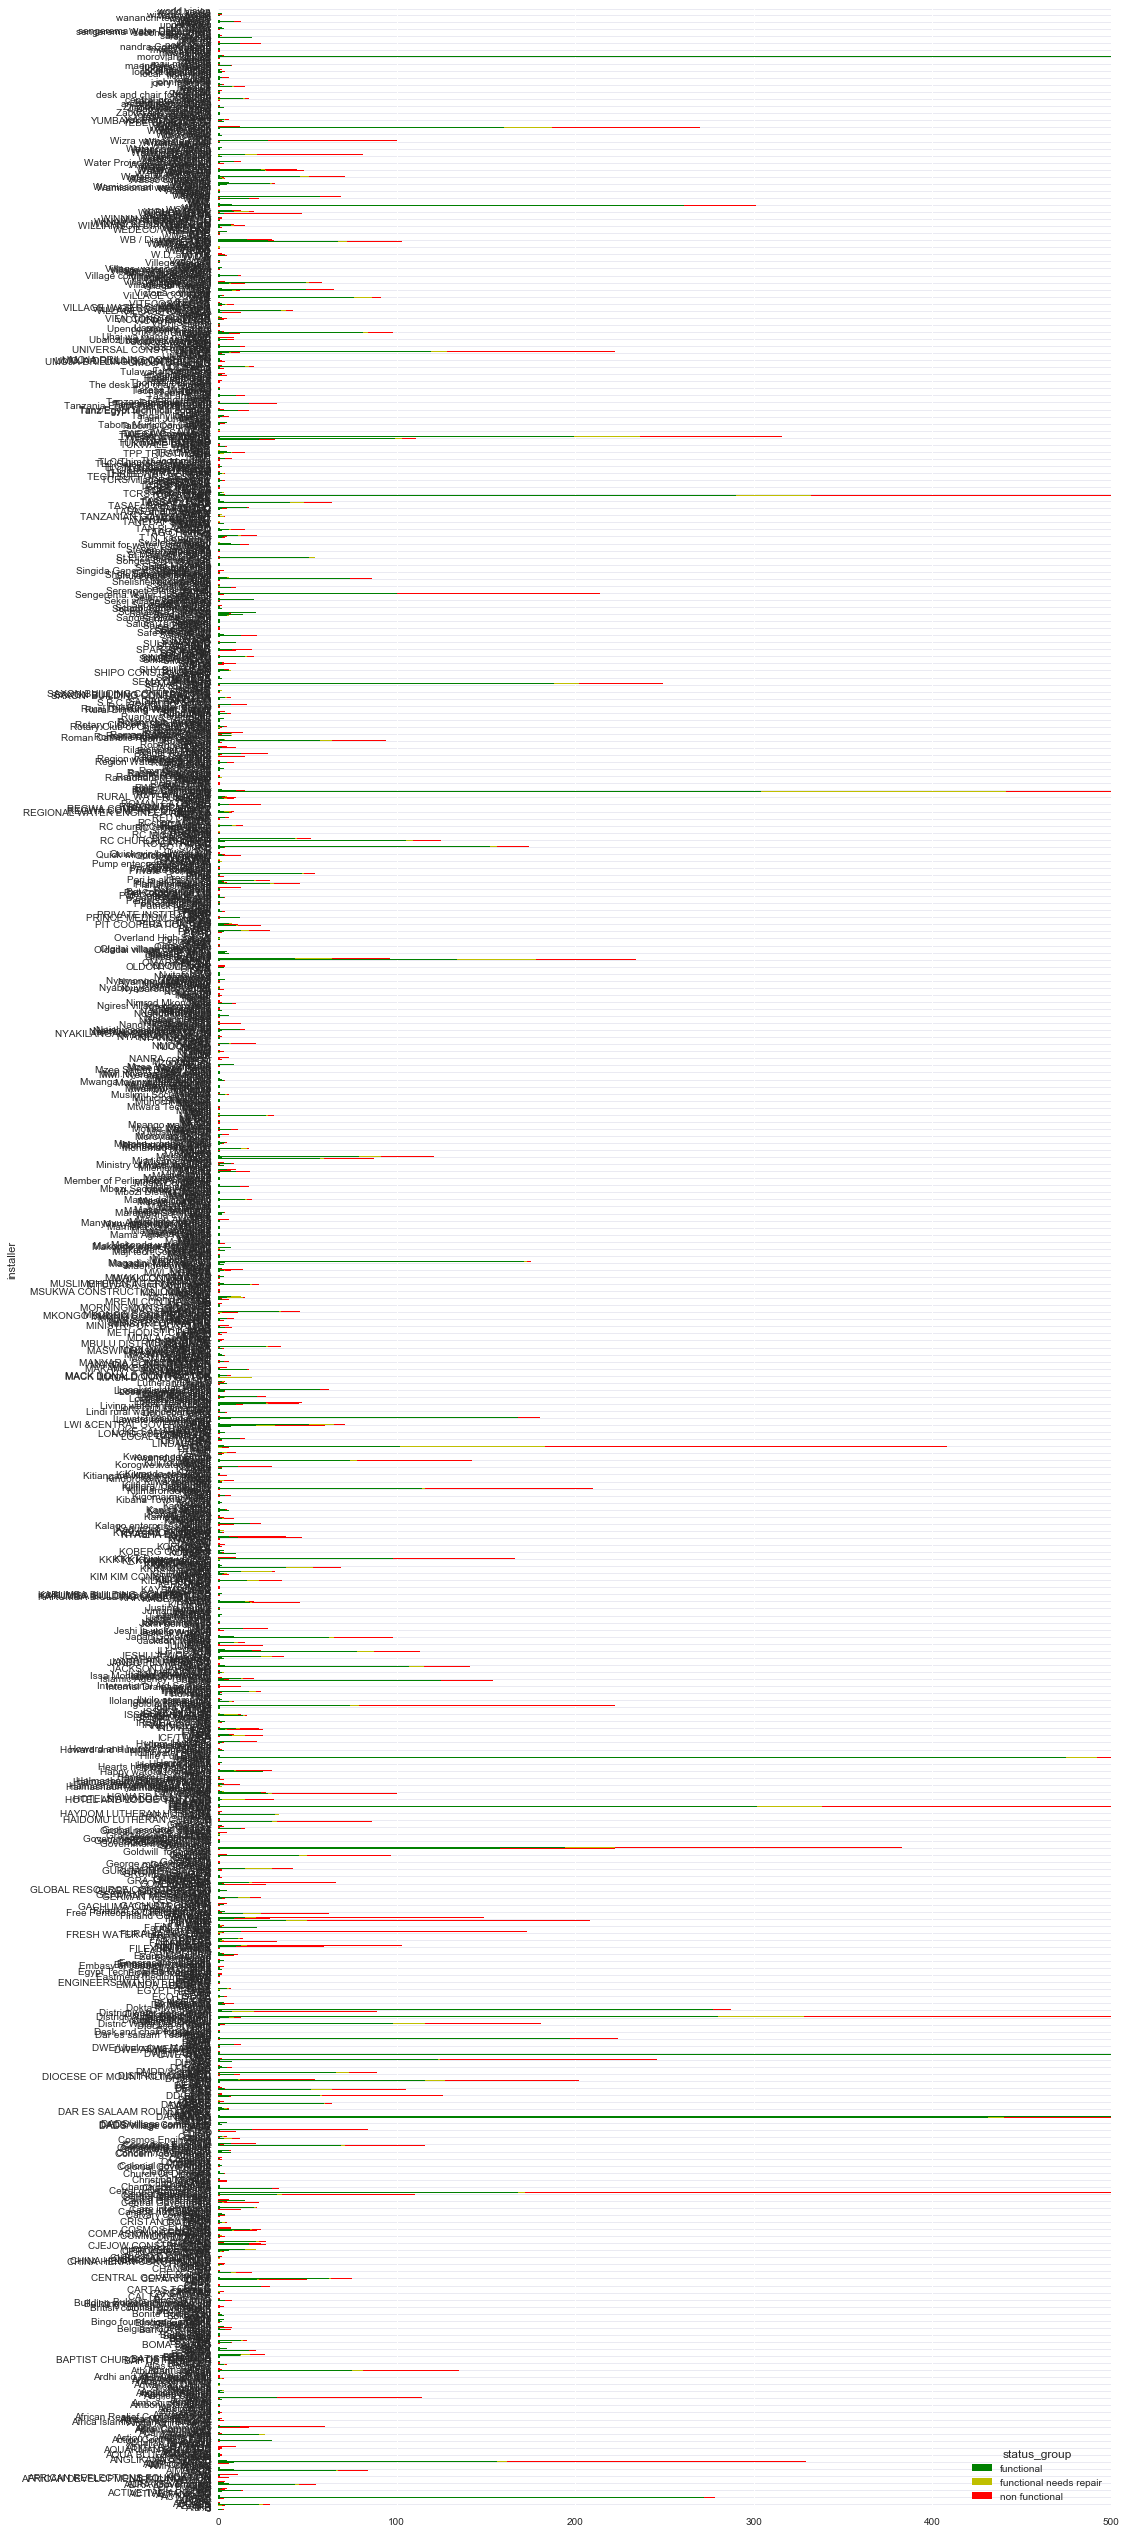

In [35]:
df_joined.groupby(['installer', 'status_group']).size().unstack().plot(kind='barh', stacked=True, color = colors,figsize=(16,46))
plt.xlim(0, 500)

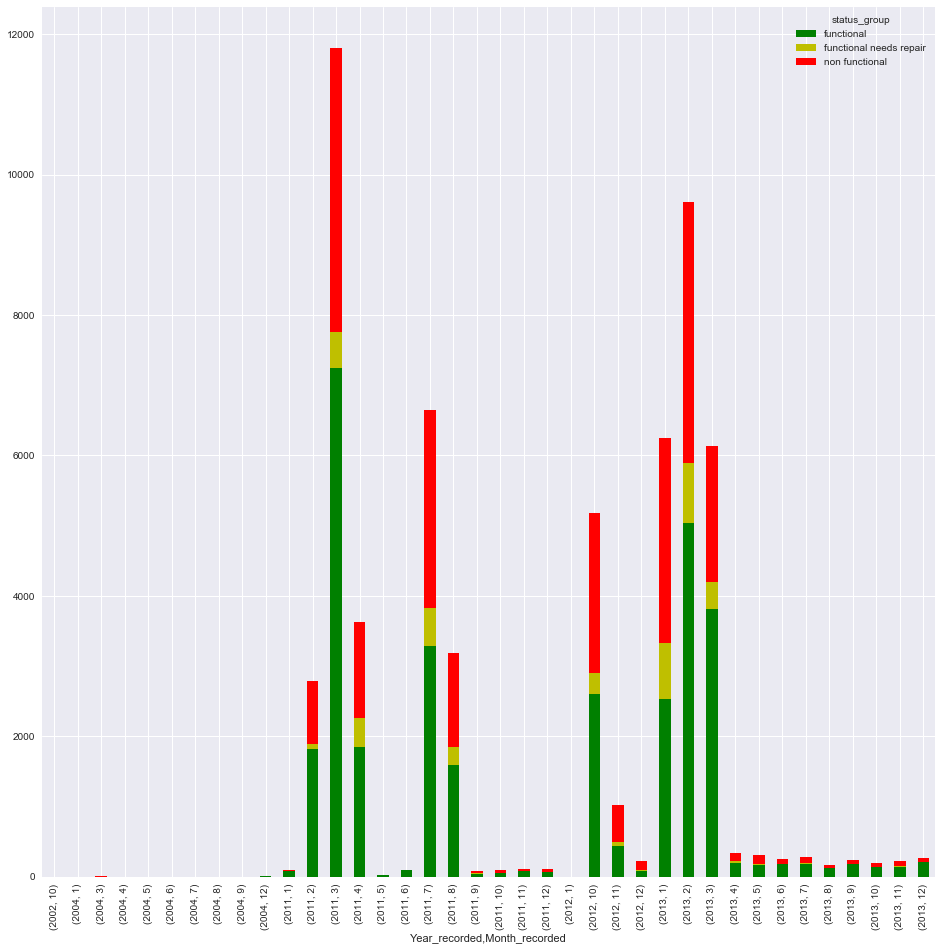

In [37]:
colors = ['g', 'y', 'r']
df_joined.groupby(['Year_recorded', 'Month_recorded','status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors,figsize=(16,16))


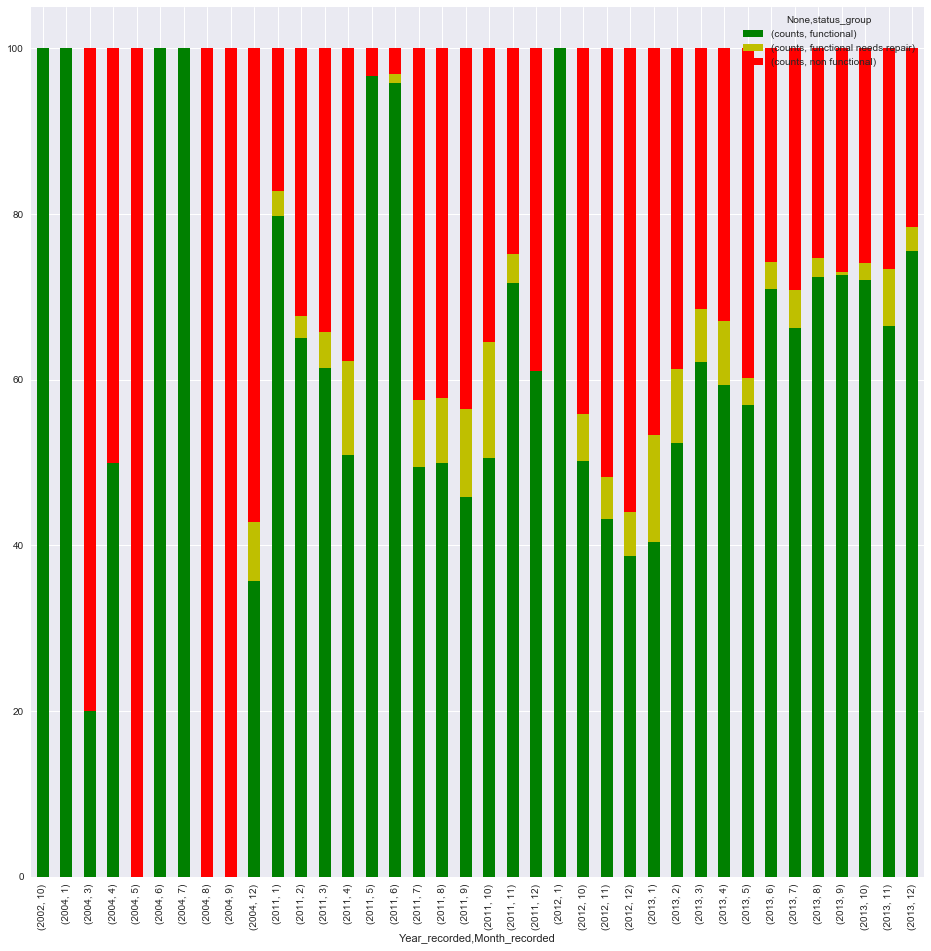

In [40]:
month_year = df_joined.groupby(['Year_recorded', 'Month_recorded','status_group']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(1,0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors,figsize=(16,16))

In [36]:
colors

['g', 'y', 'r']

(25, 45)

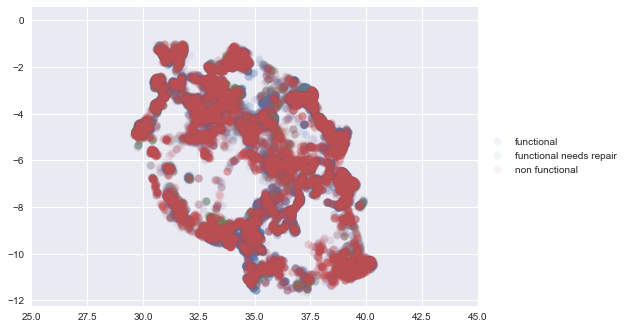

In [37]:
groups = df_joined.groupby('status_group')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=8, alpha=0.08,label=name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(25, 45)
plt.show()

In [ ]:
k

(25, 45)

(25, 45)

(25, 45)

C:\Users\jtlam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


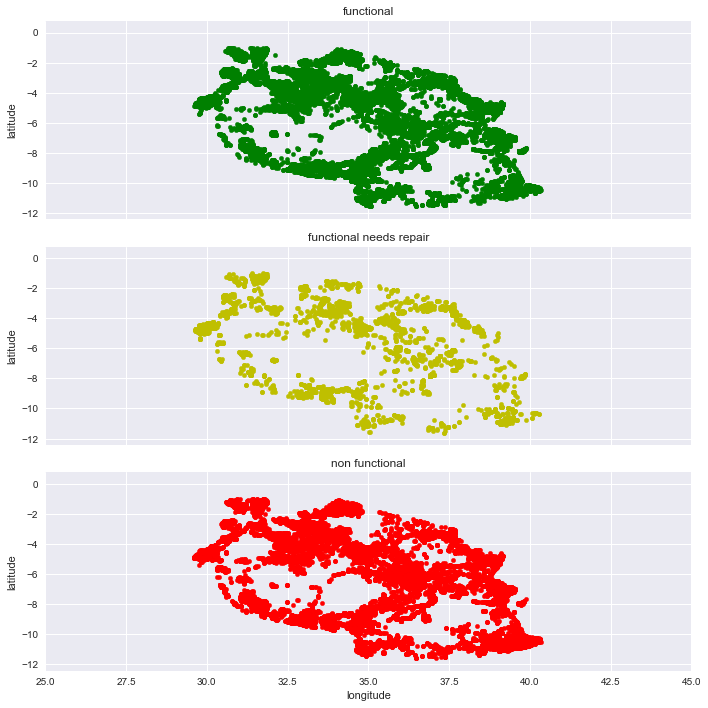

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10,10), squeeze=False)
axes_list = [item for sublist in axes for item in sublist] 
colors = {'functional':'g', 'functional needs repair':'y', 'non functional':'r'}
for k, v in df_joined.groupby('status_group'):
    ax = axes_list.pop(0)
    v.plot(x='longitude', y='latitude', c=colors[k],kind ='scatter', label=k, ax=ax, legend=False)
    plt.xlim(25, 45)
    ax.set_title(k)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
fig.savefig('full_figure.png')    
plt.tight_layout()

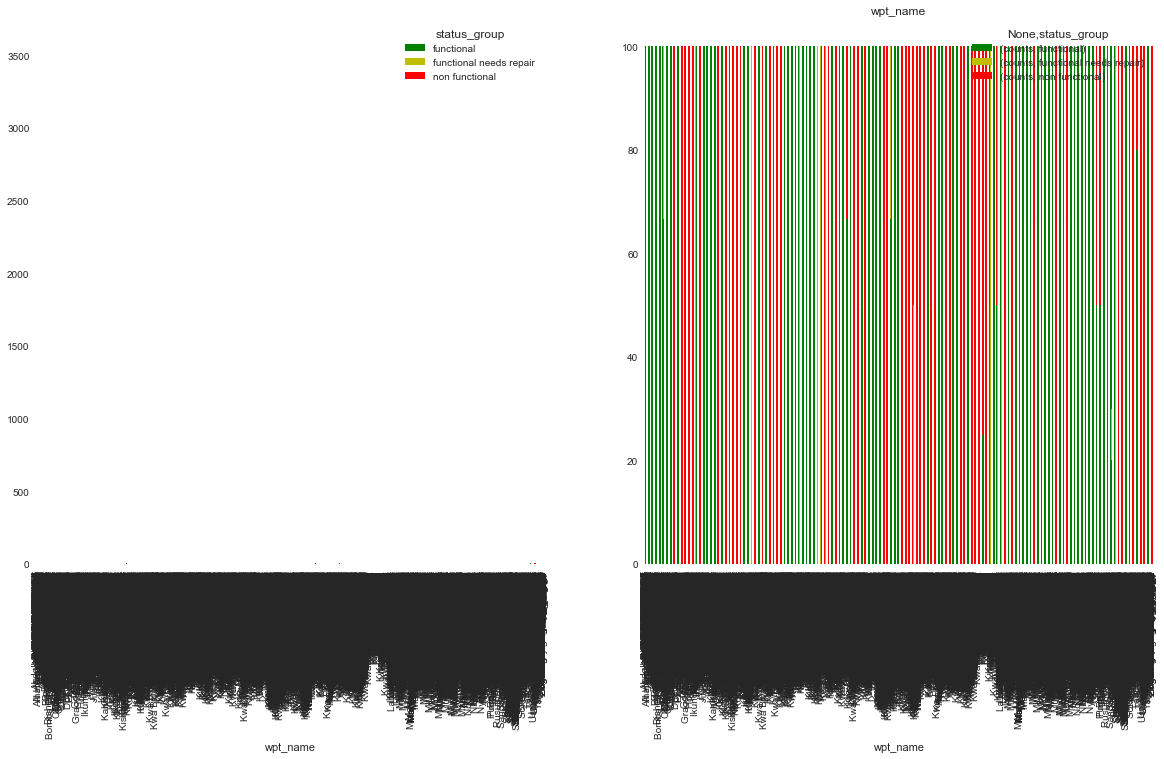

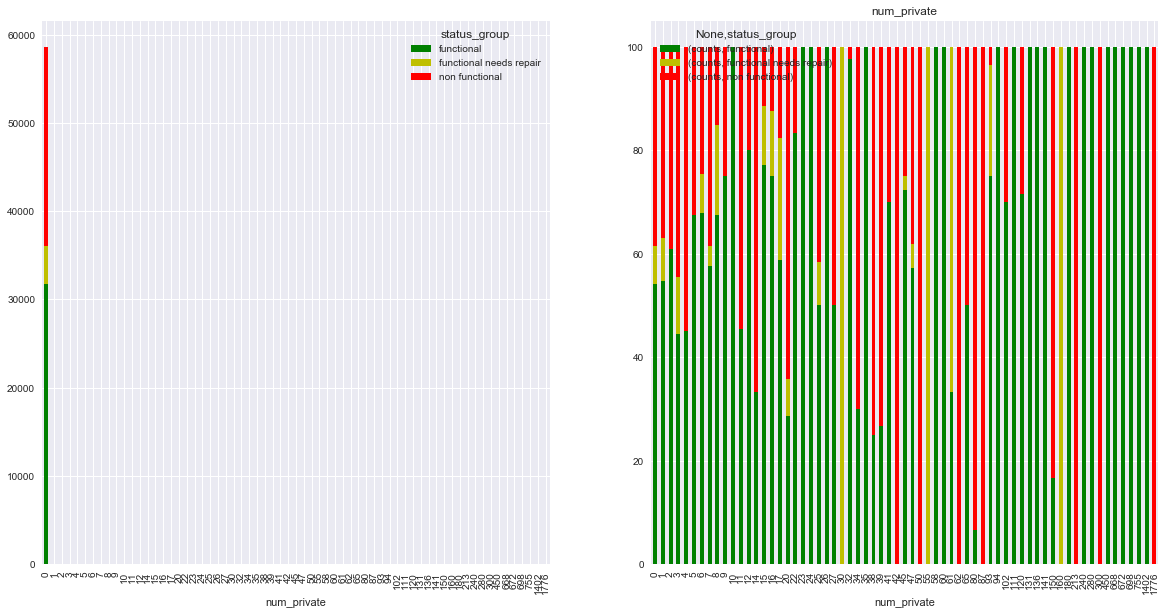

In [42]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(8,10):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')   

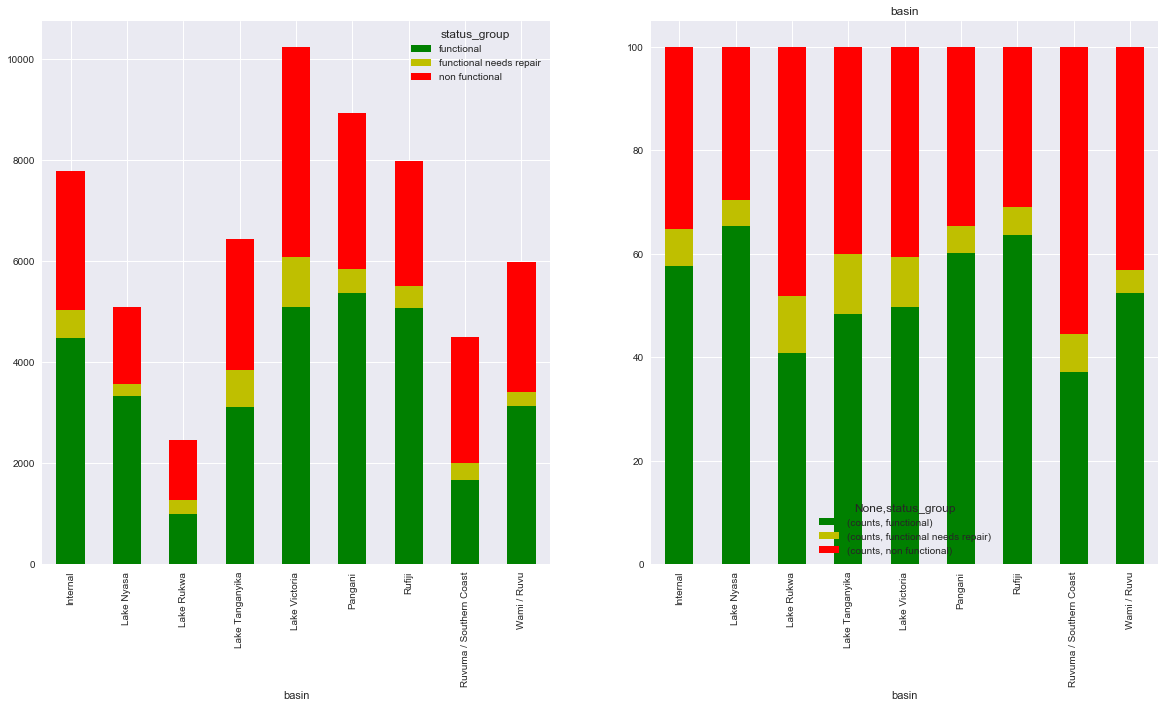

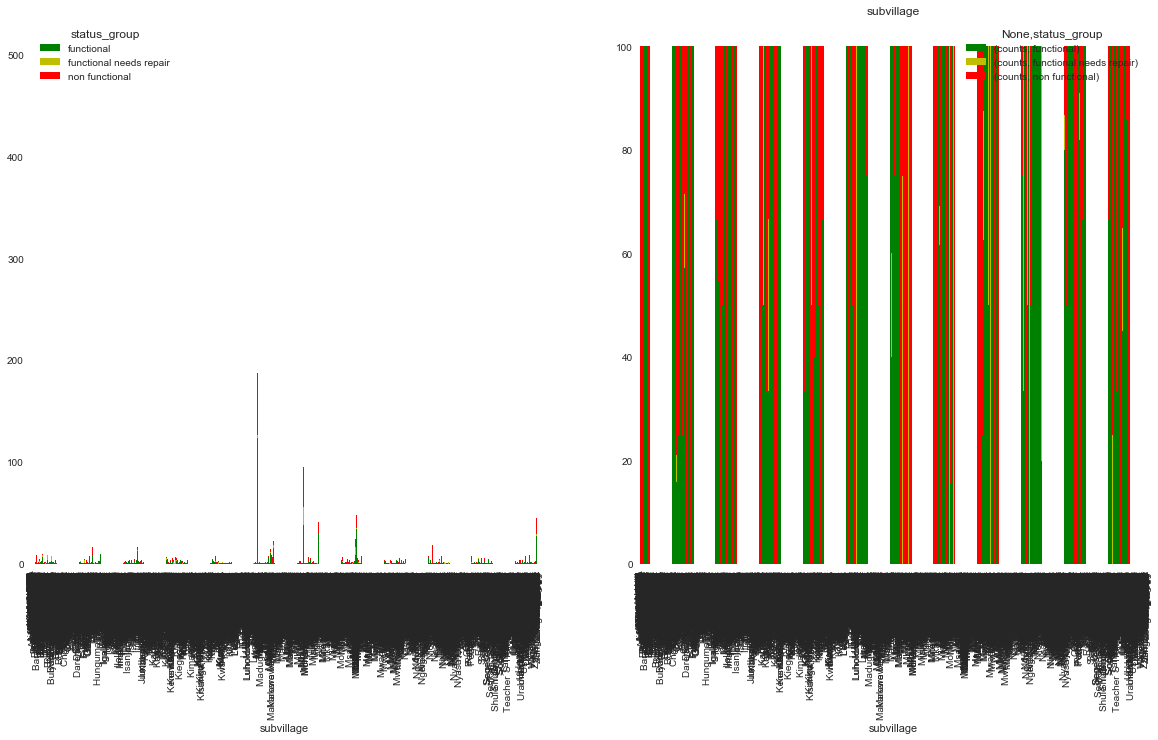

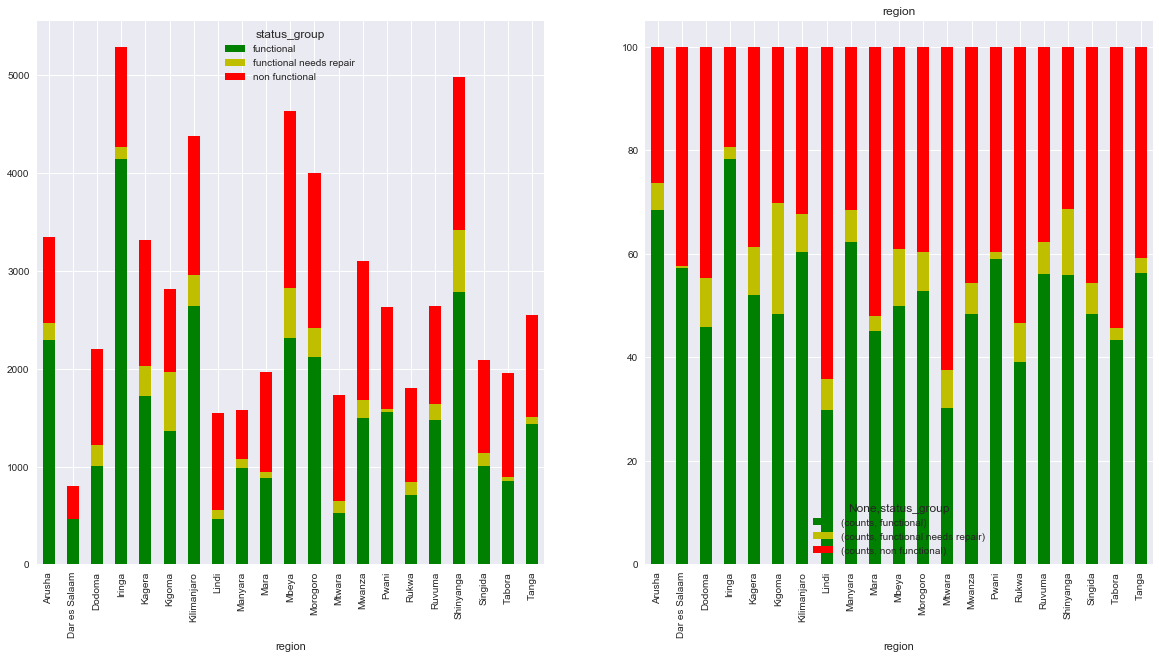

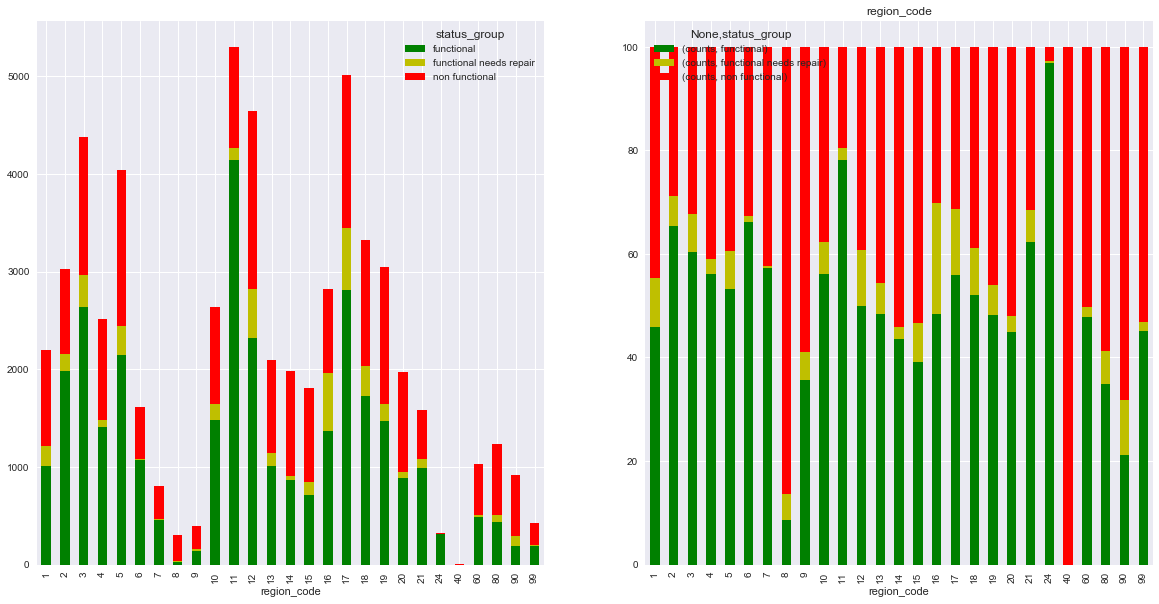

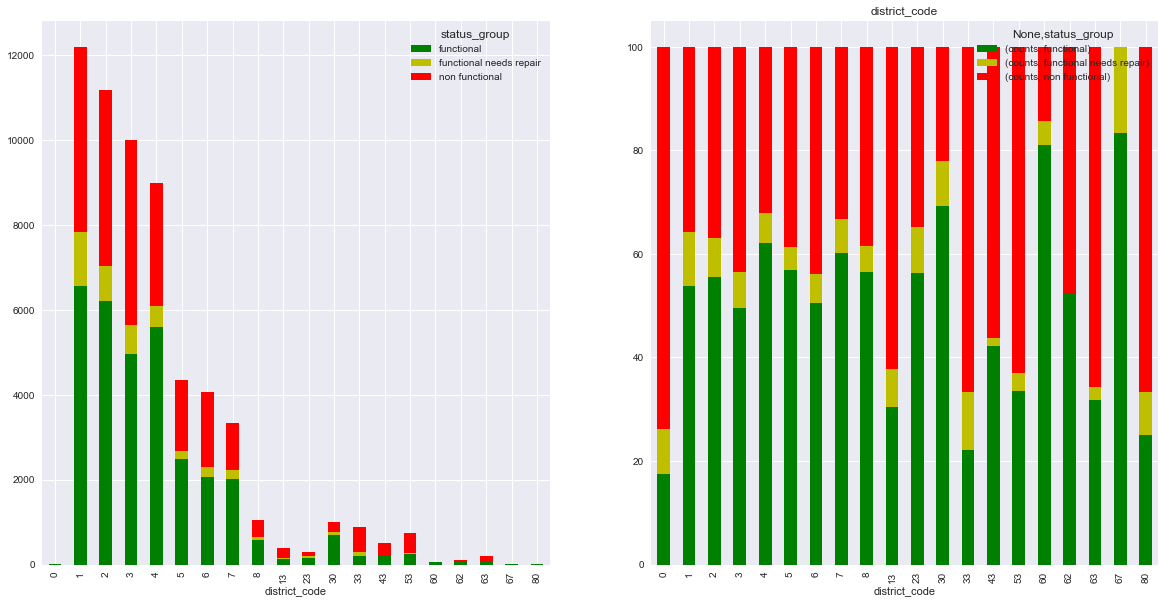

In [44]:

colors_set = ['g', 'y', 'r']
for k in range(10,15):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')

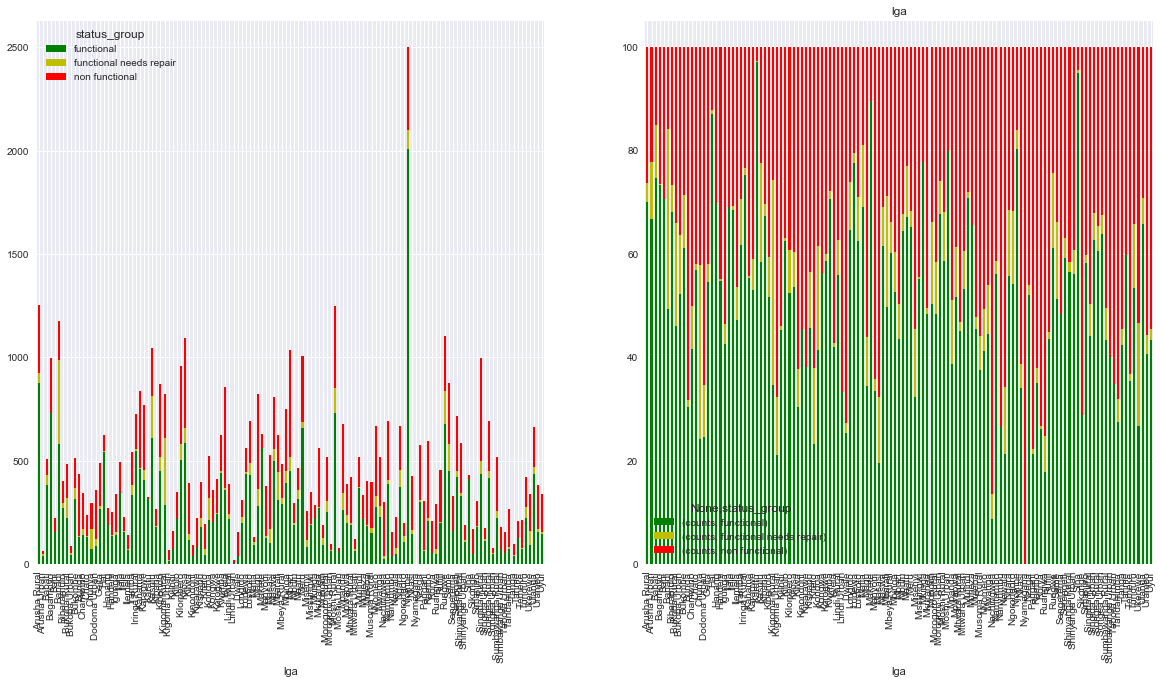

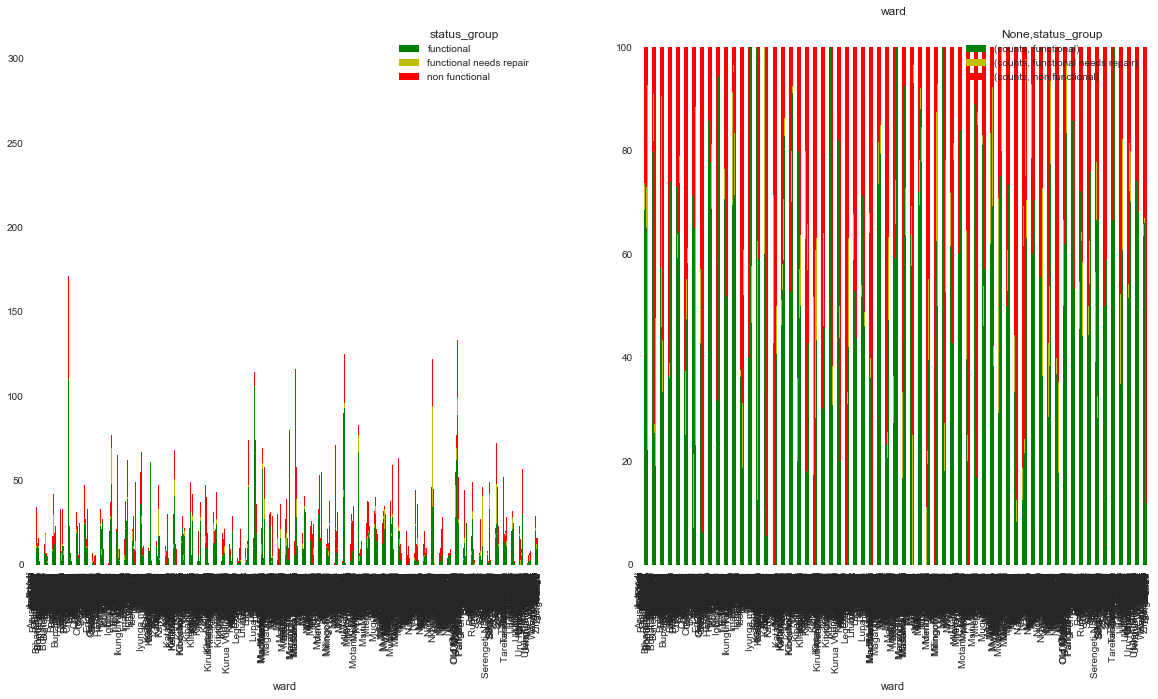

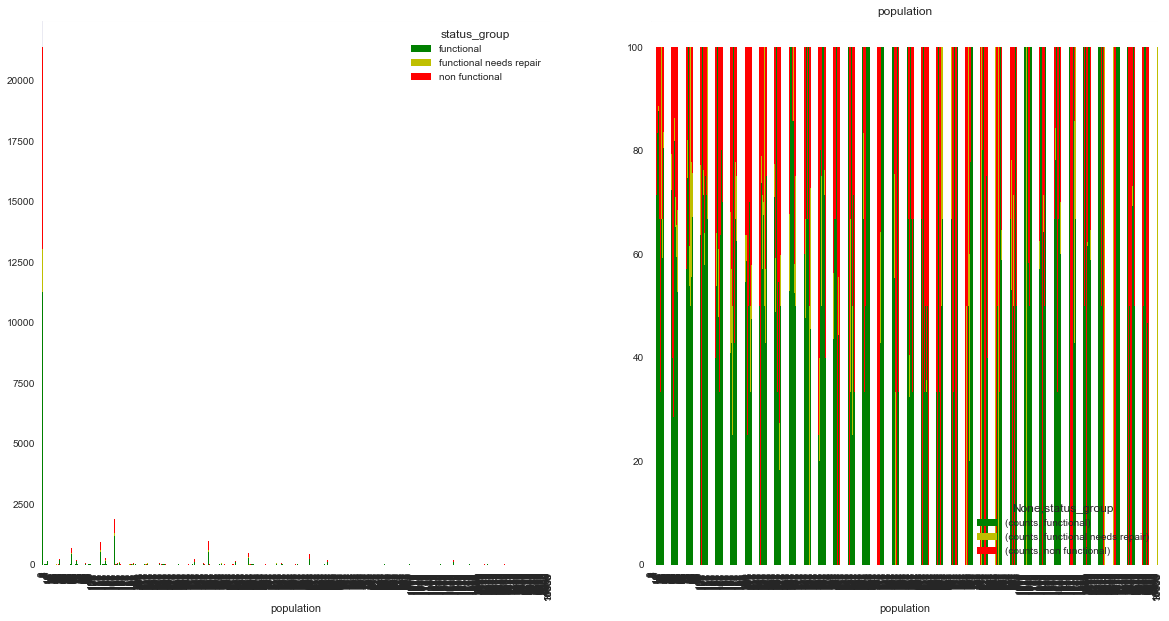

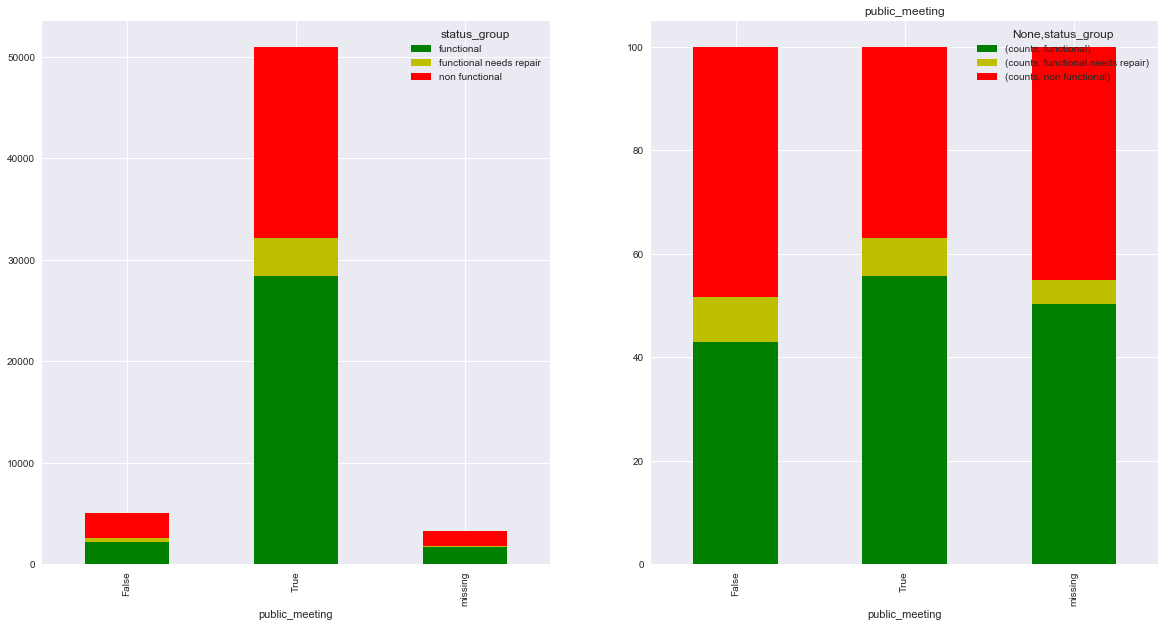

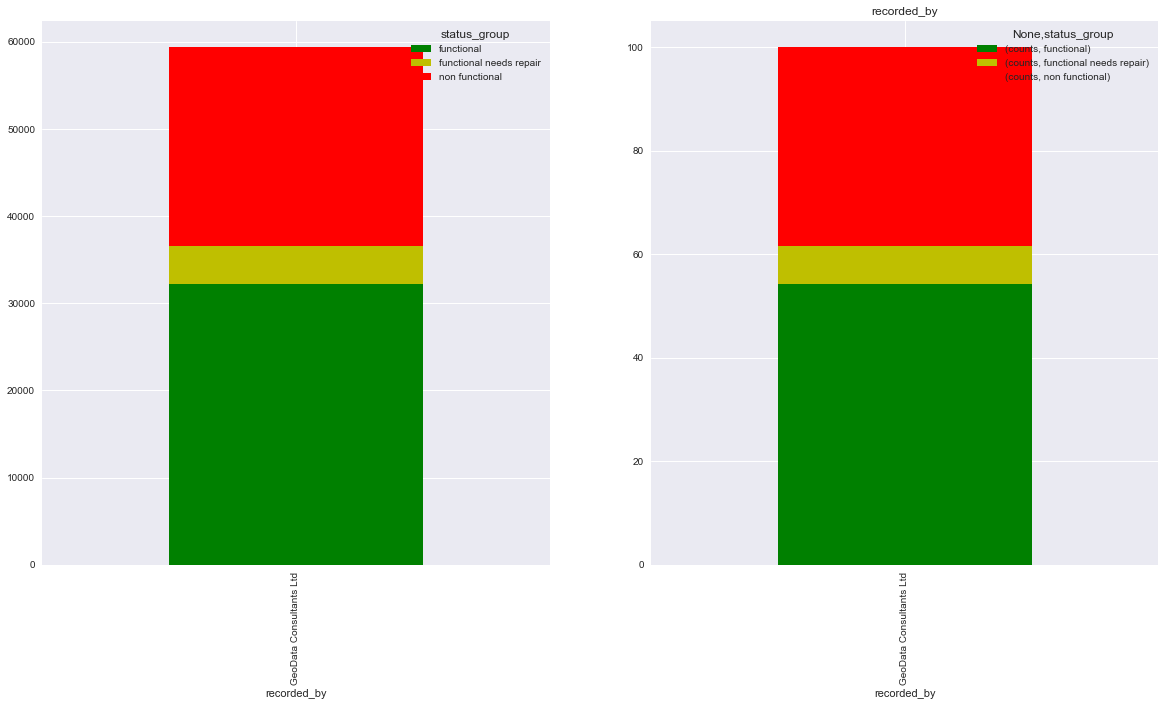

In [46]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(15,20):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')

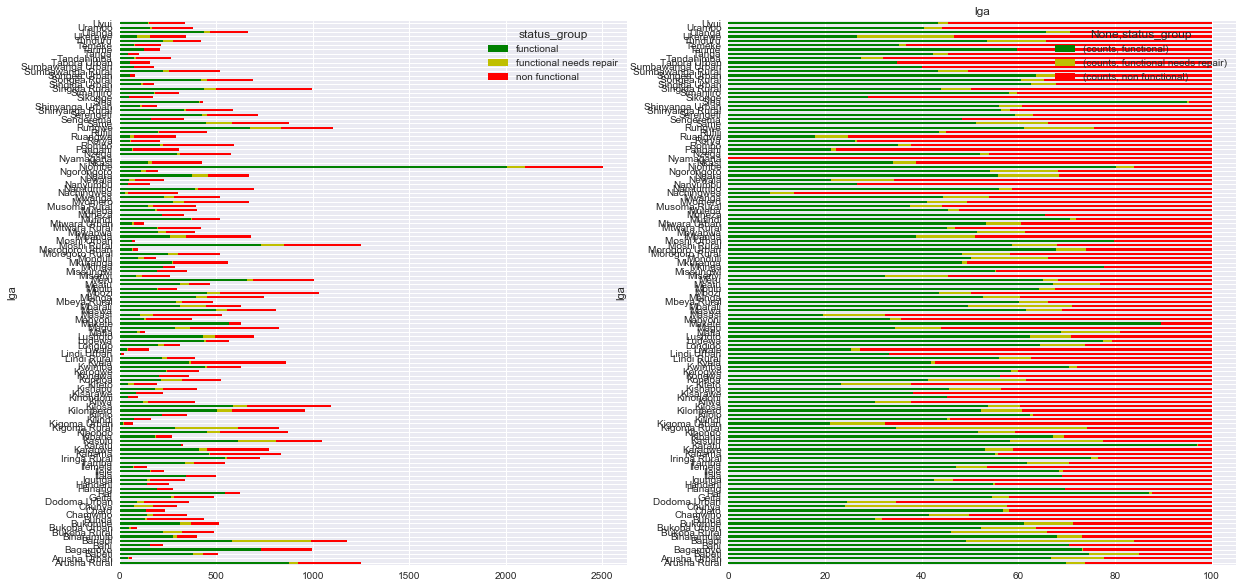

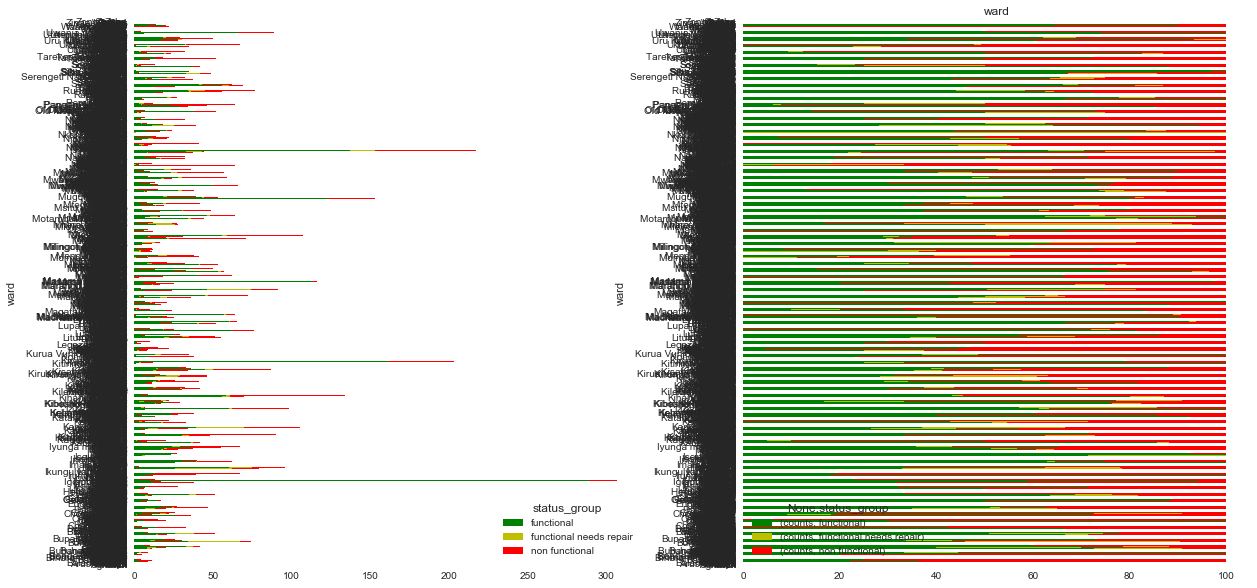

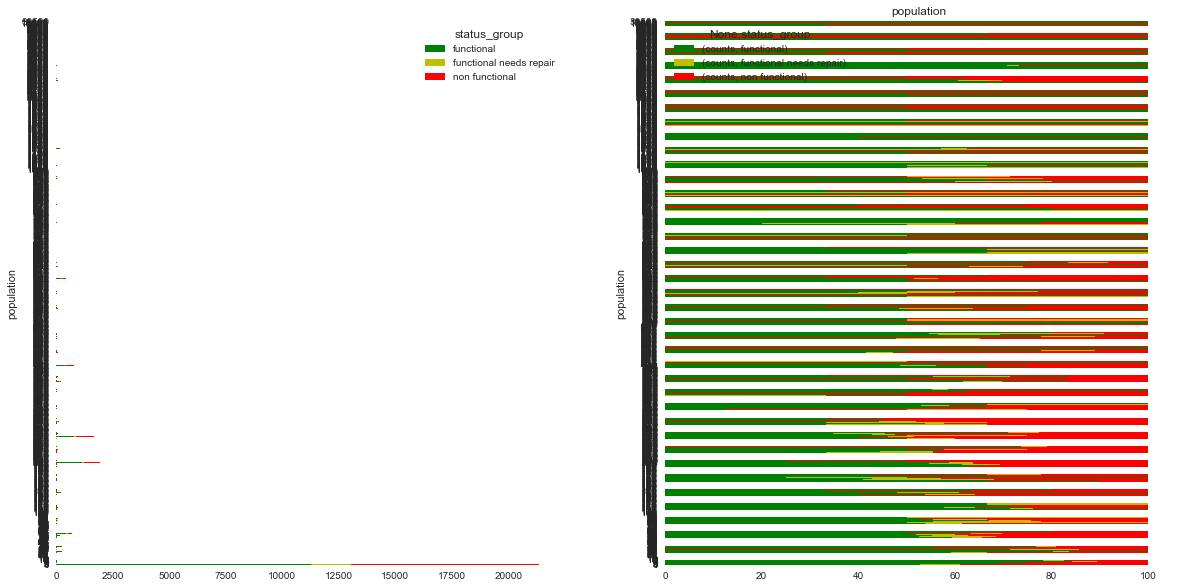

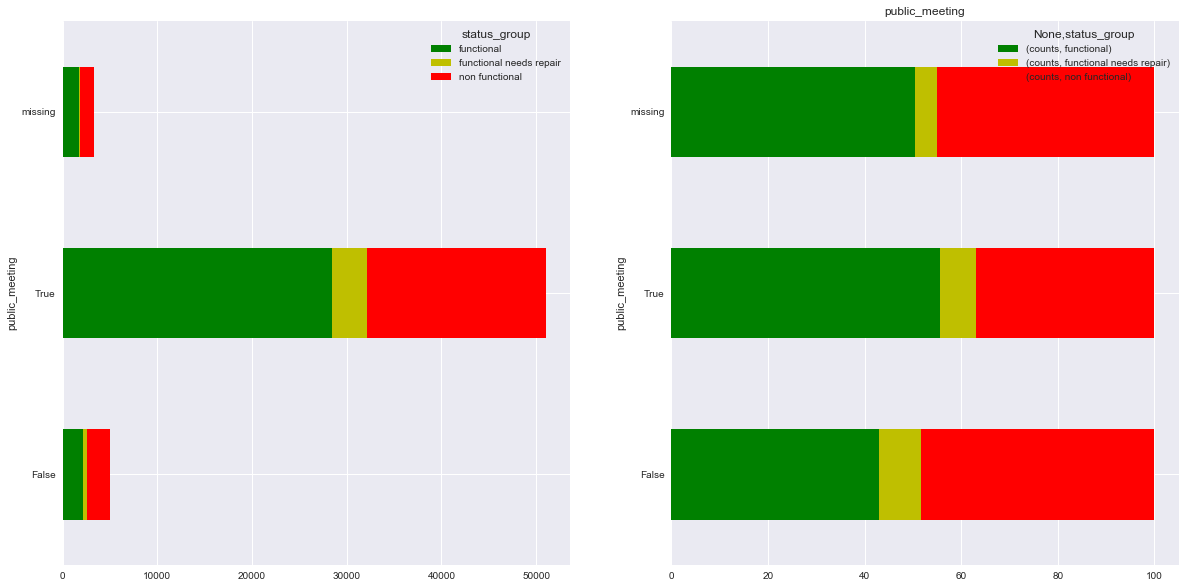

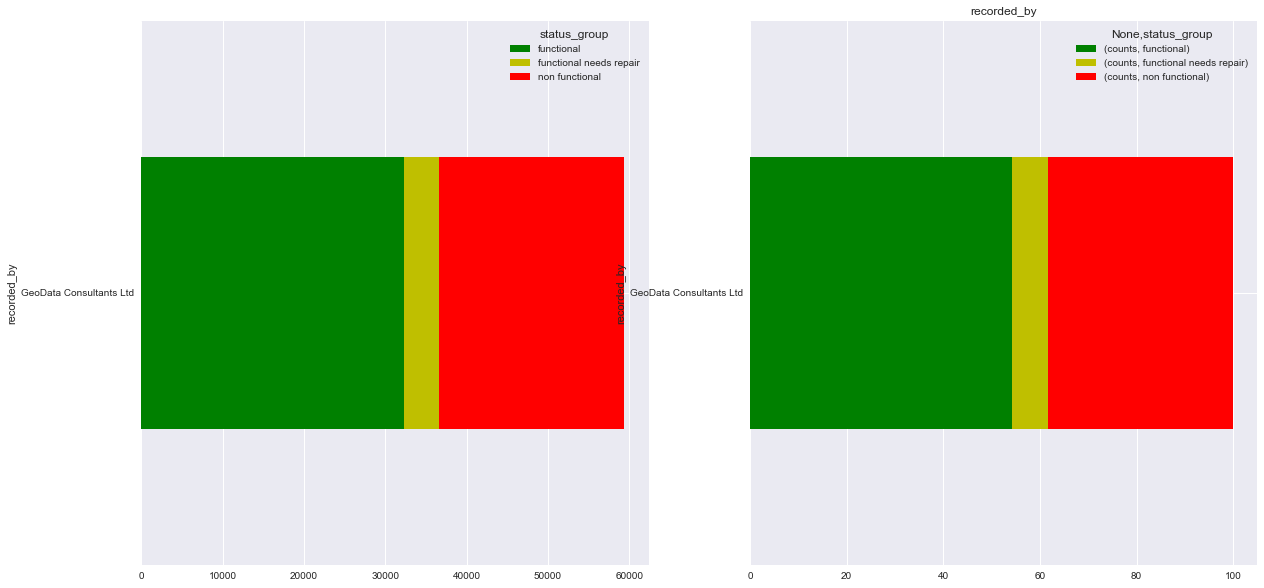

In [47]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(15,20):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='barh', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='barh', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')

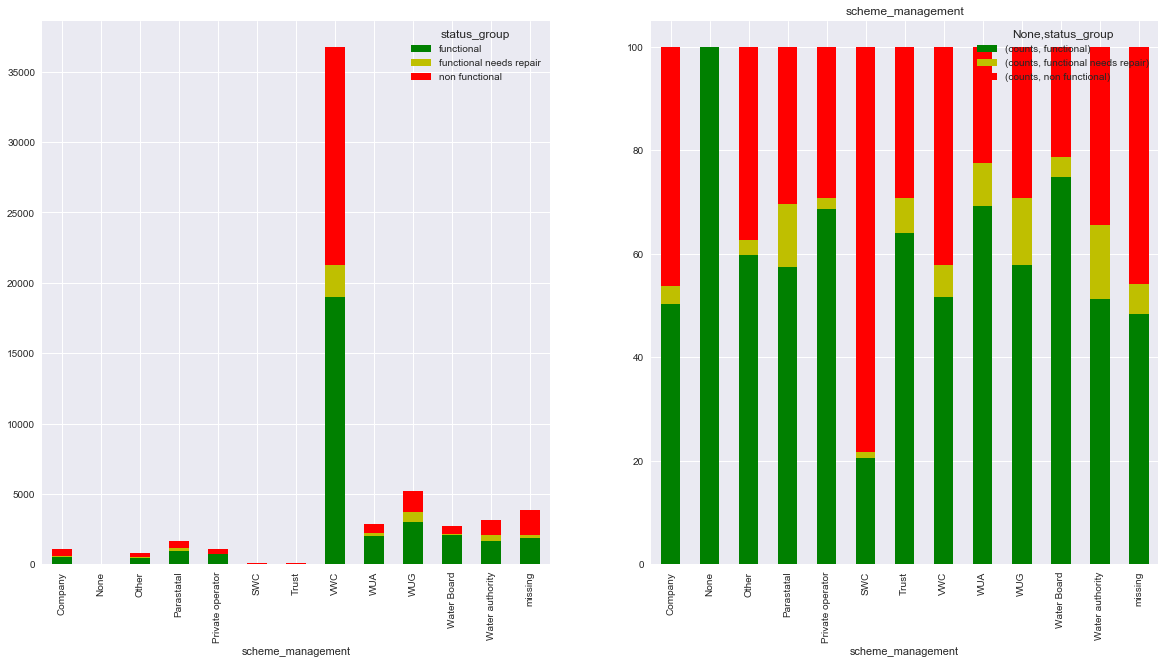

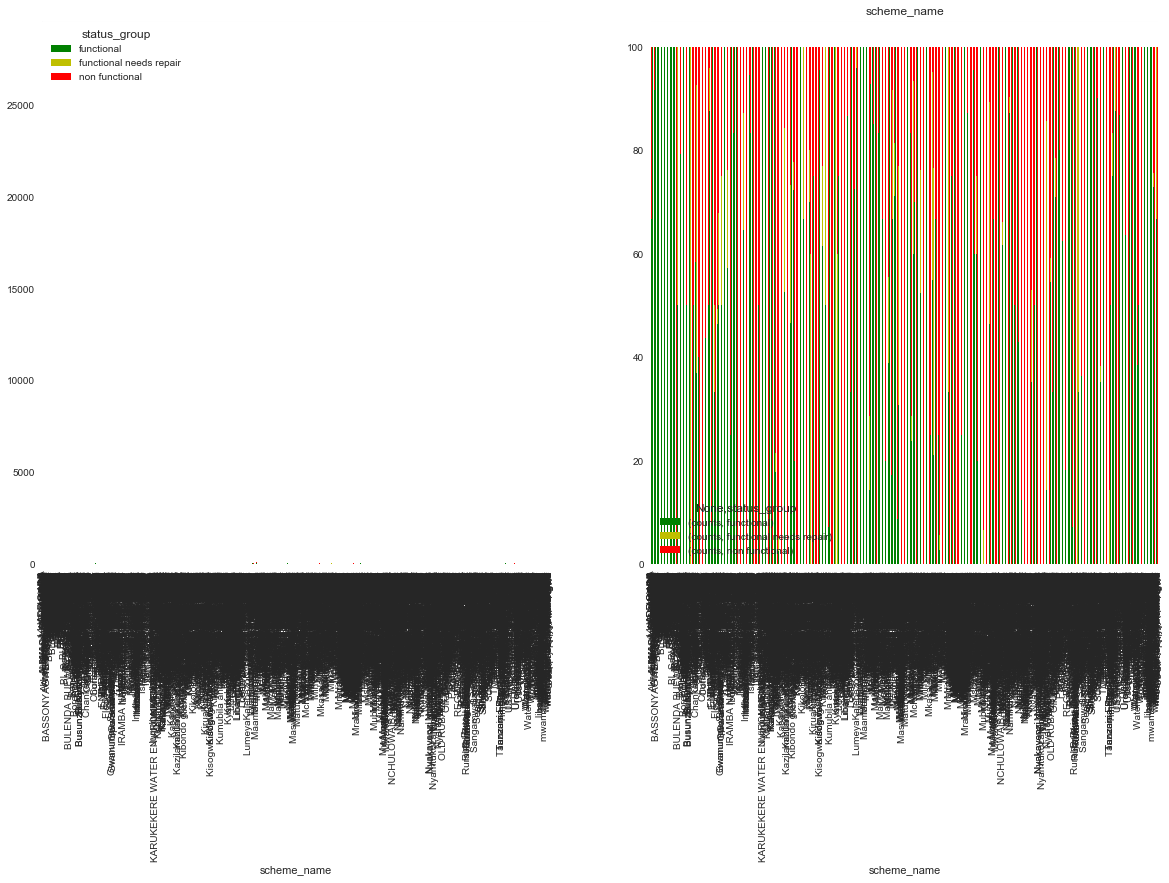

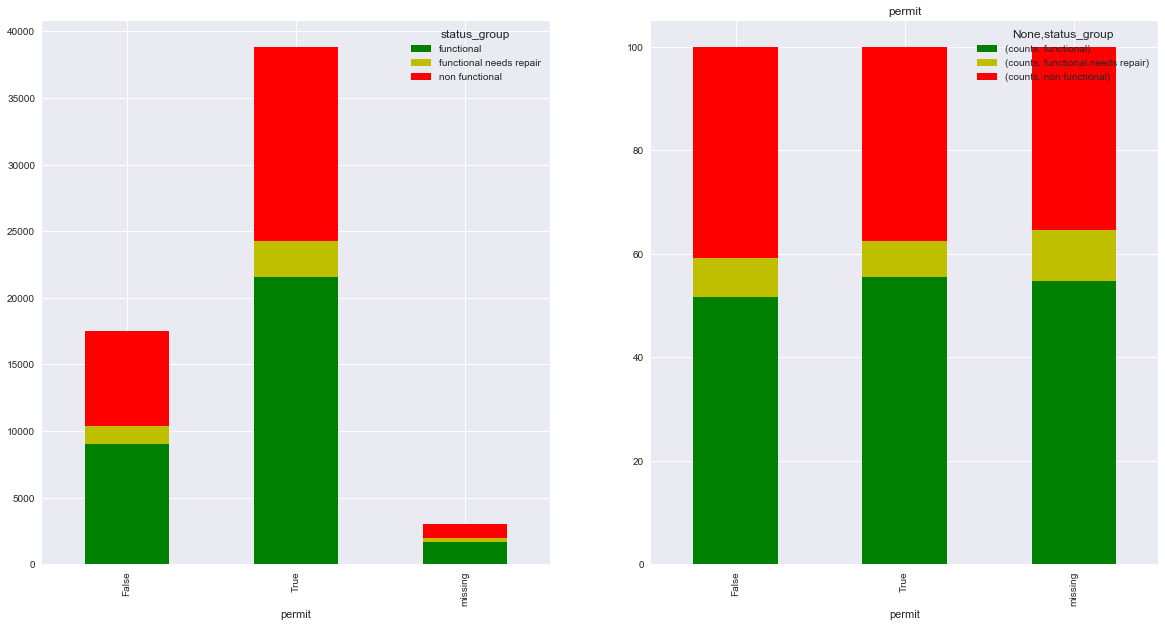

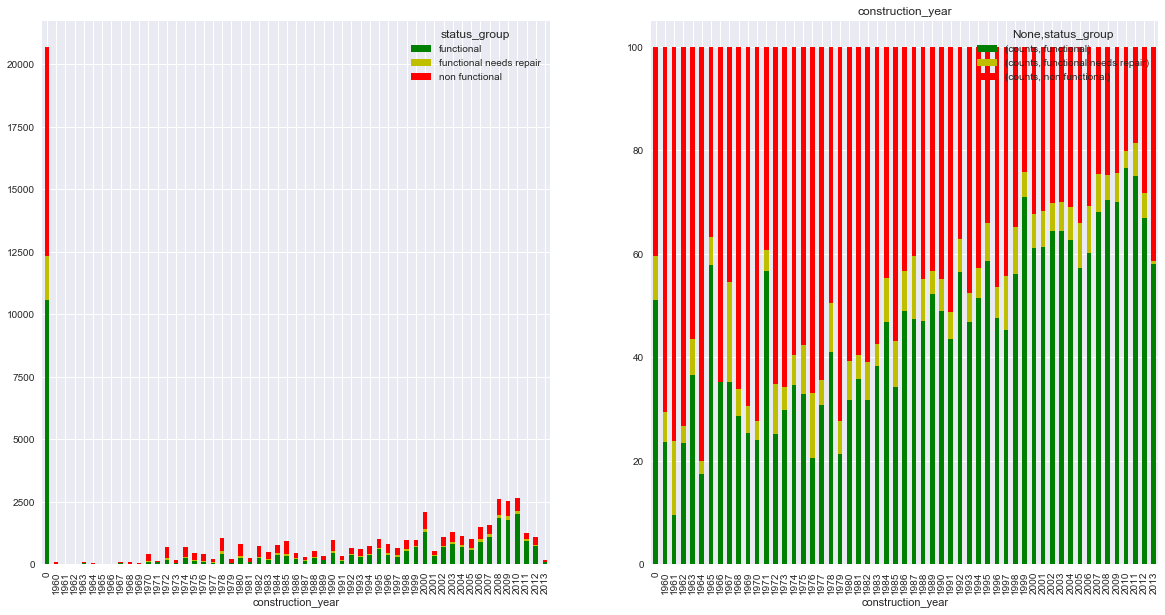

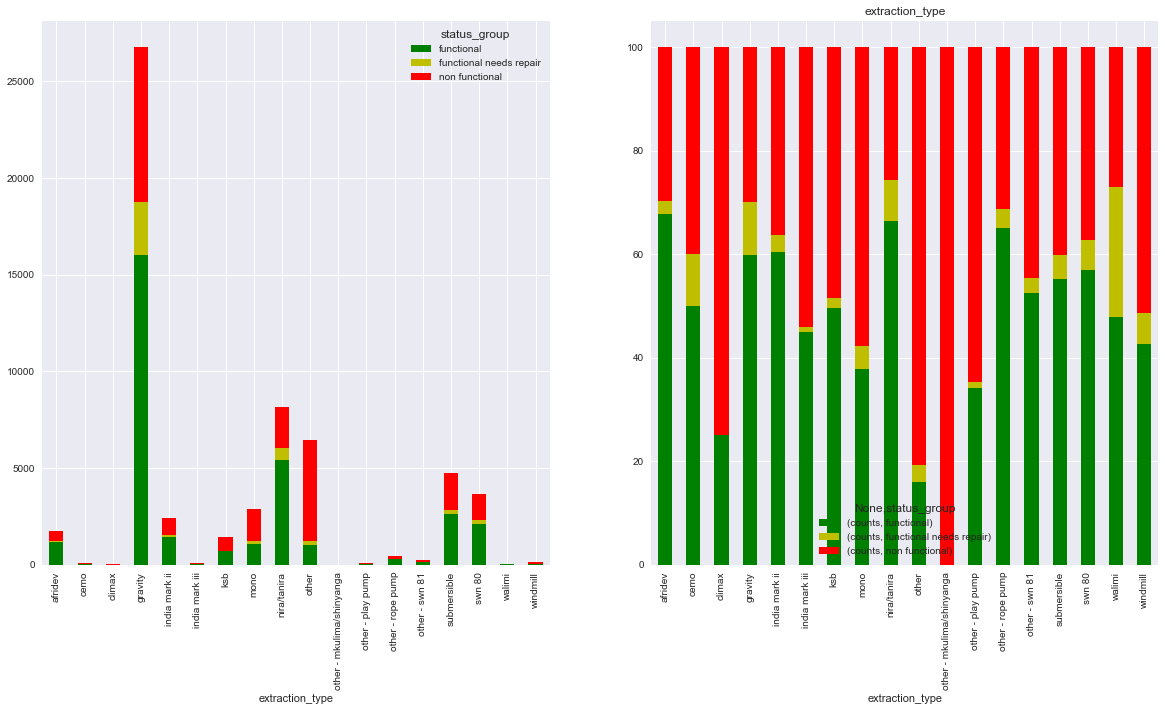

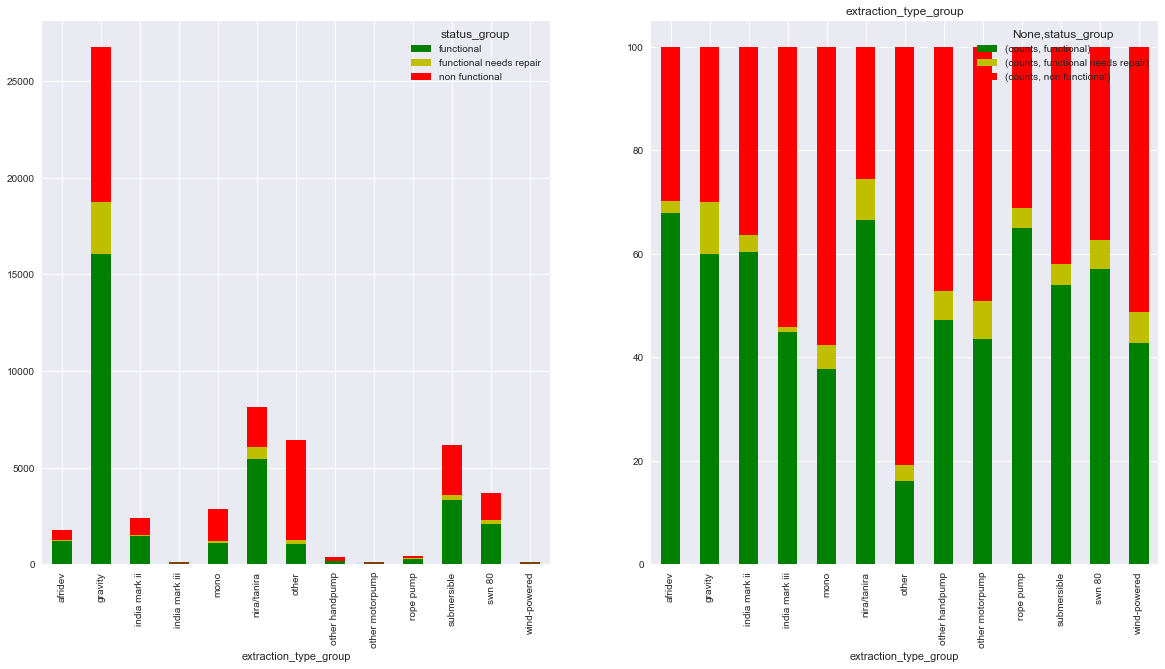

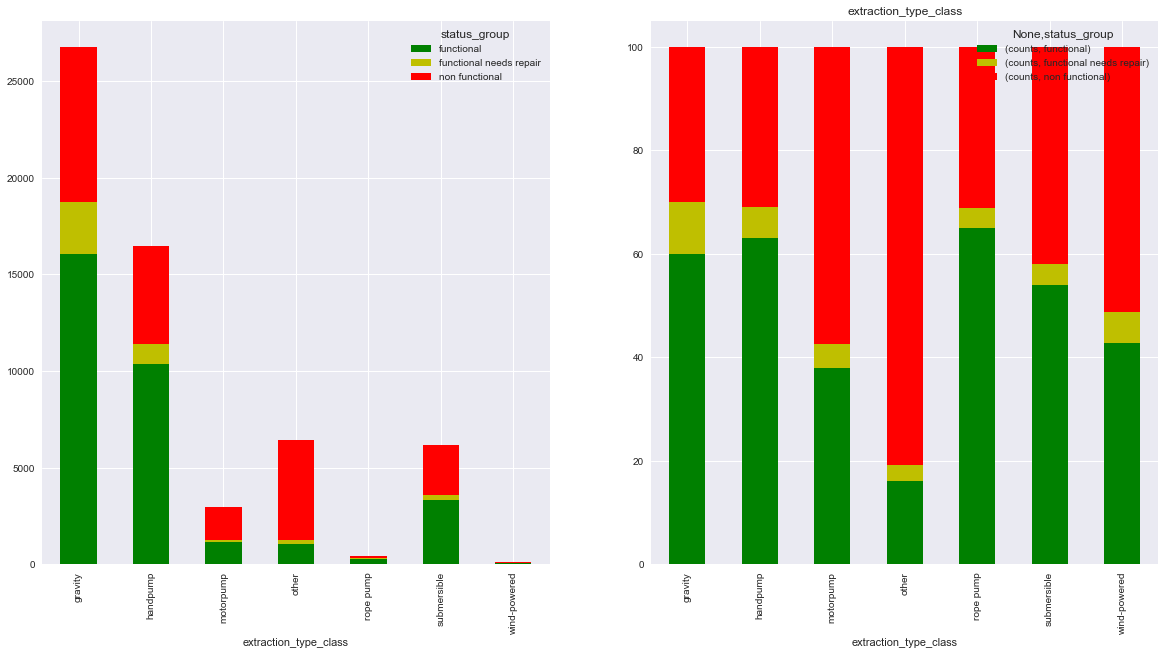

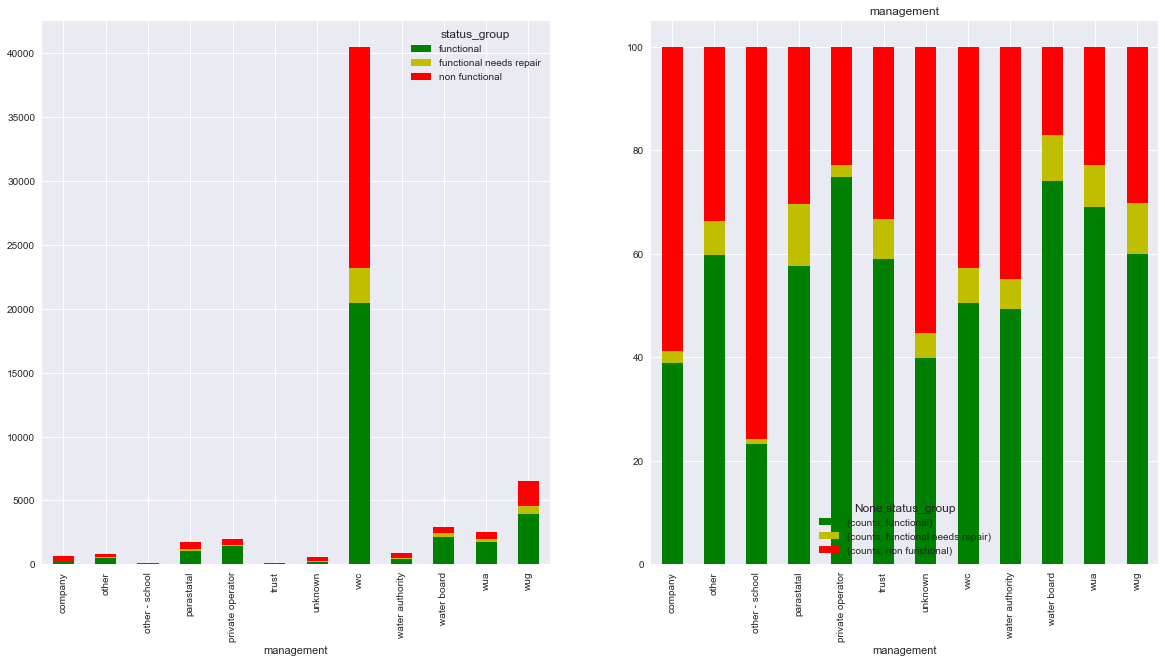

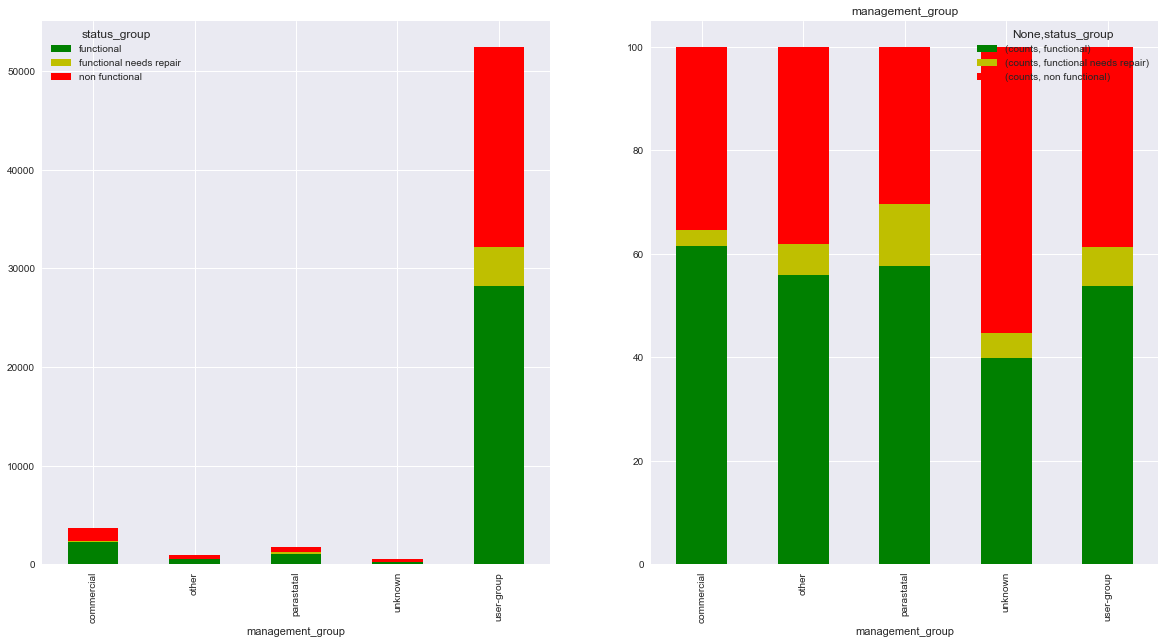

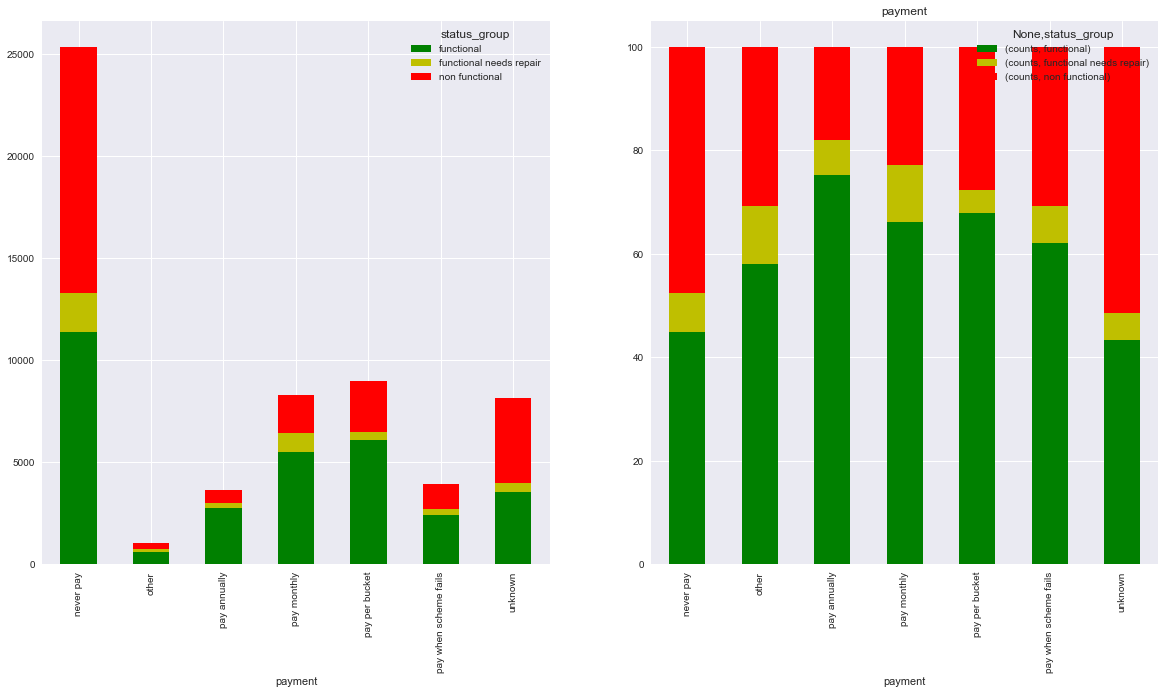

In [48]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(20,30):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')

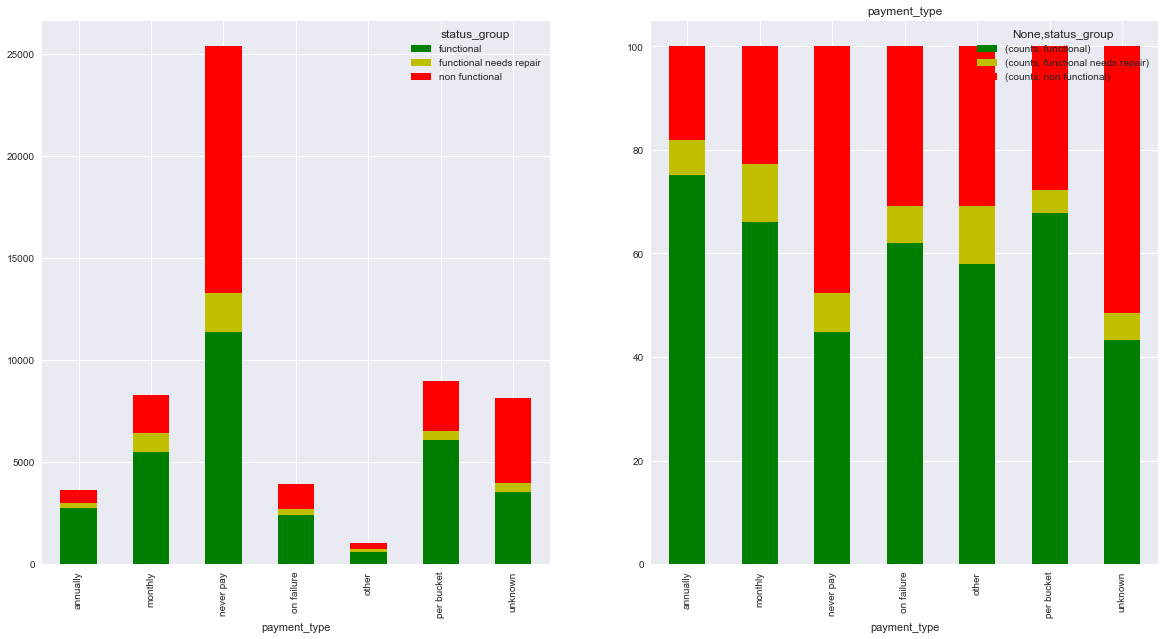

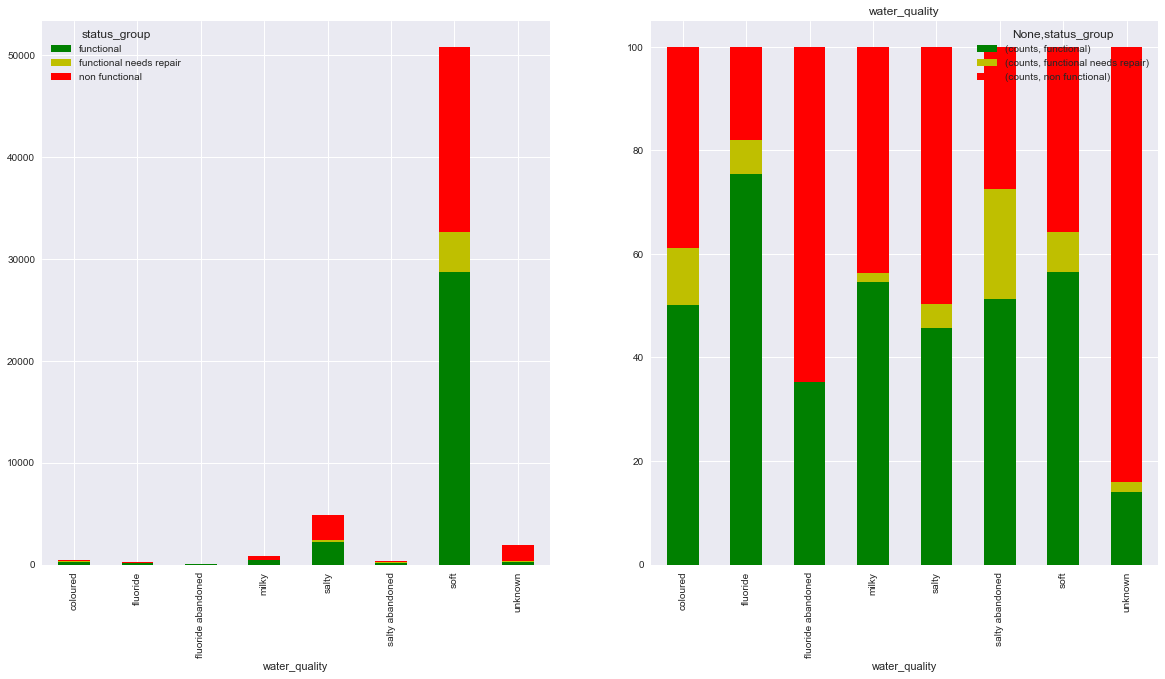

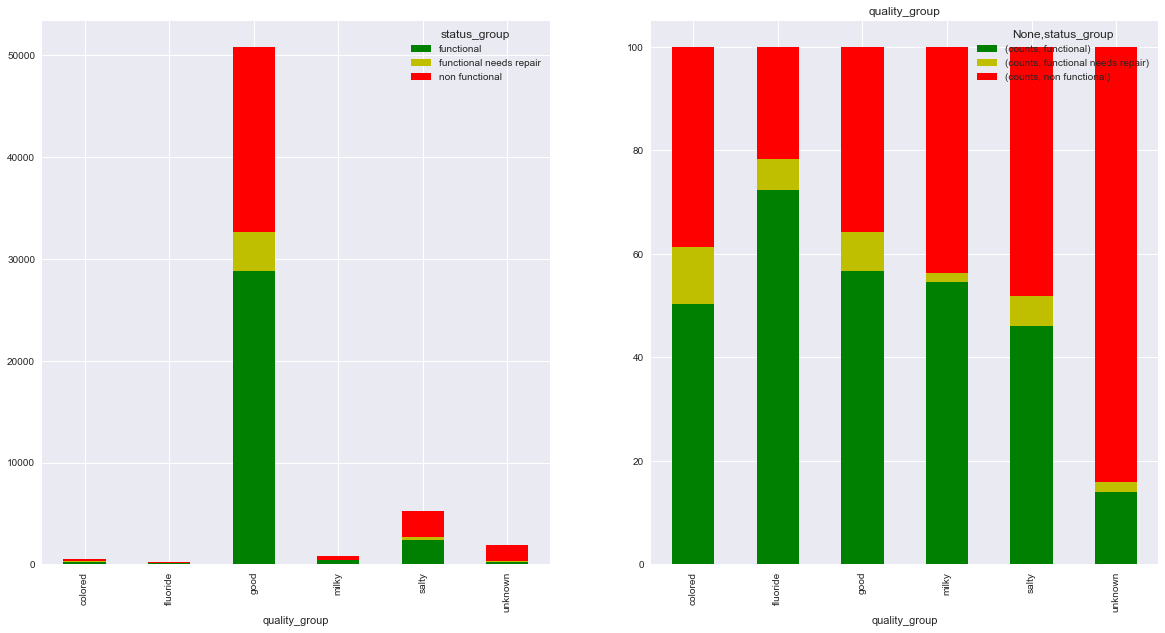

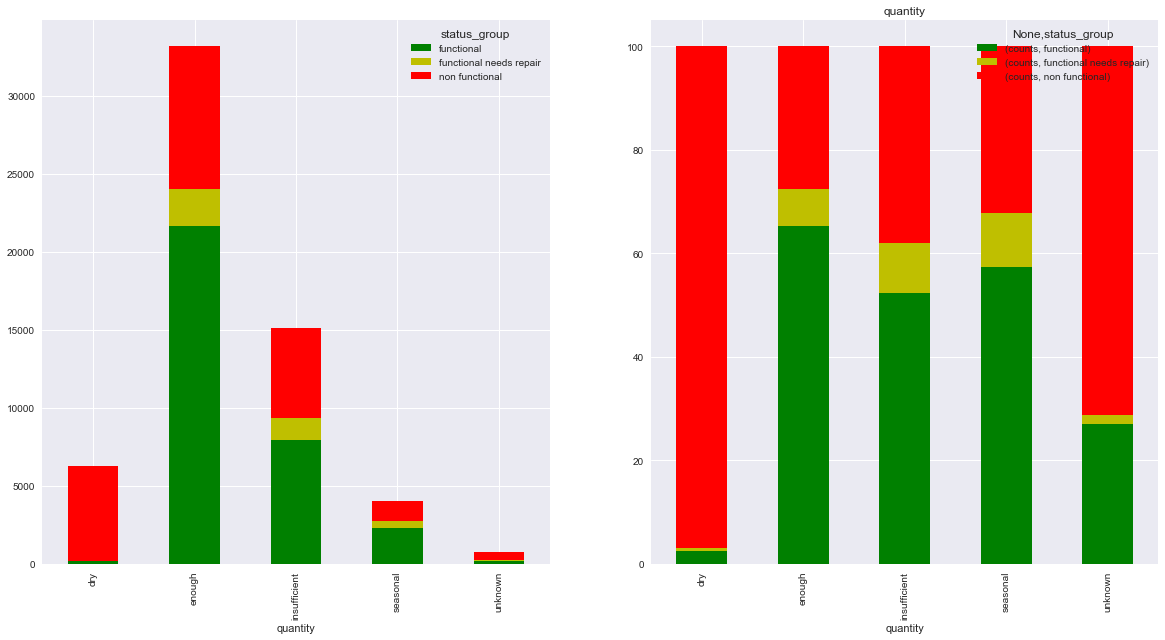

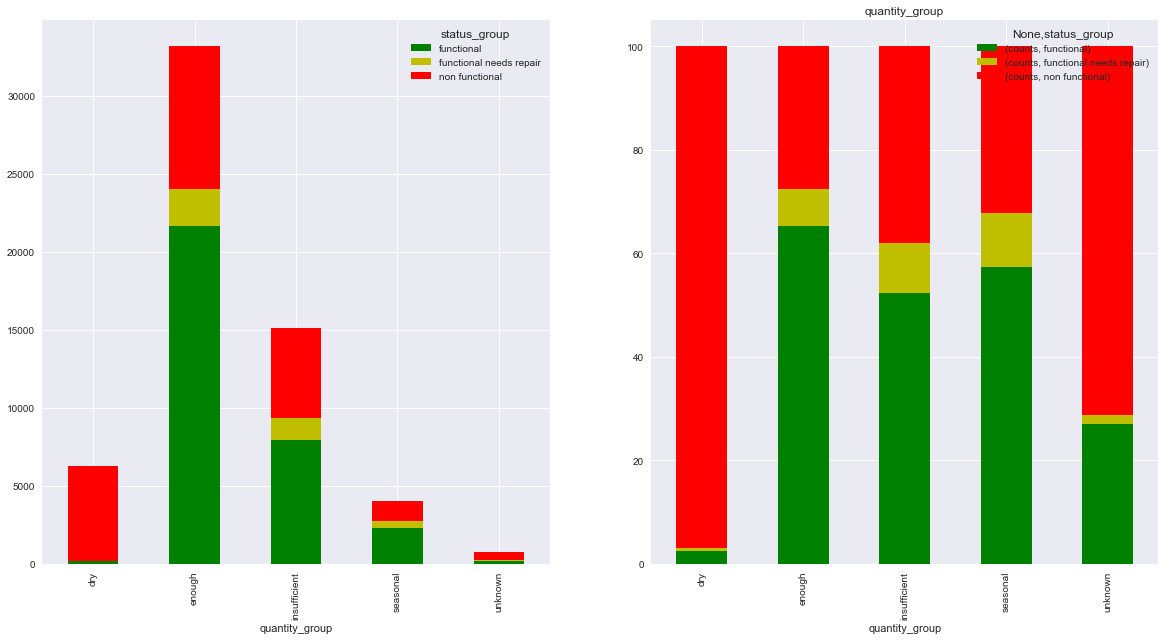

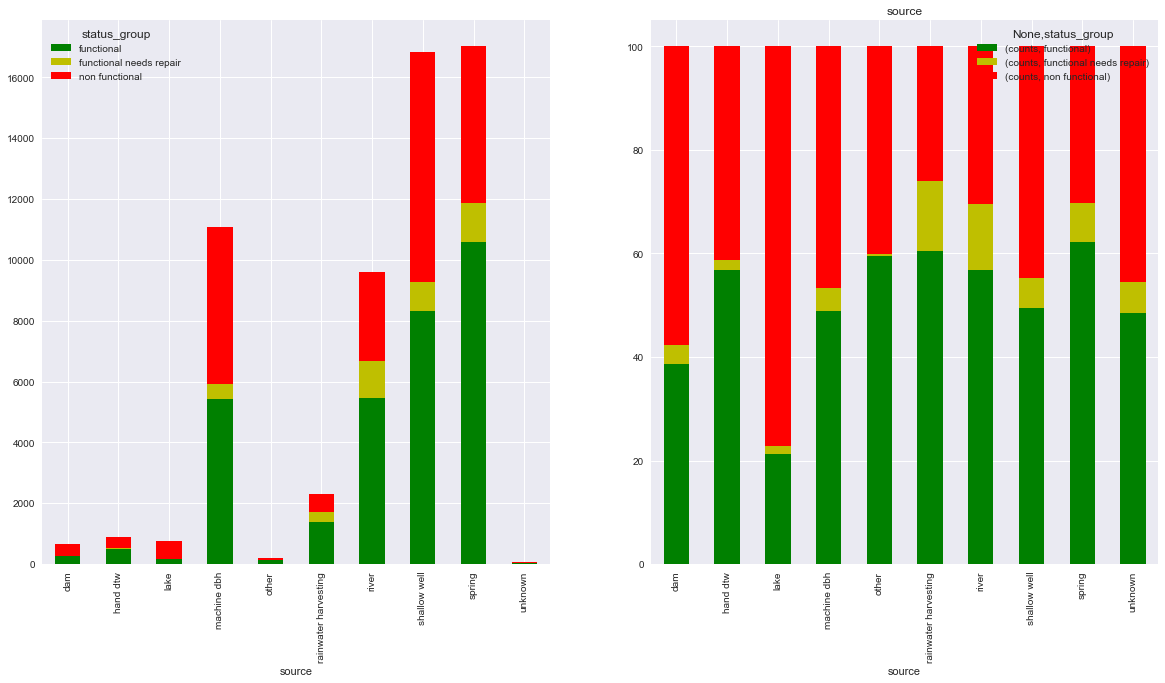

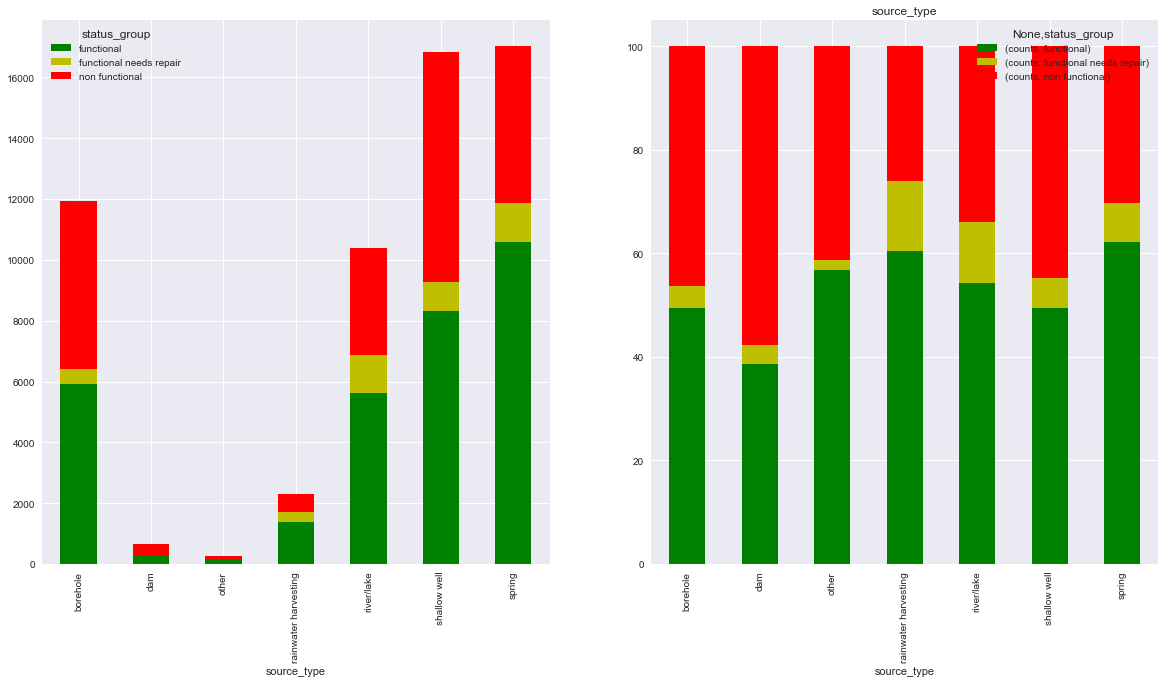

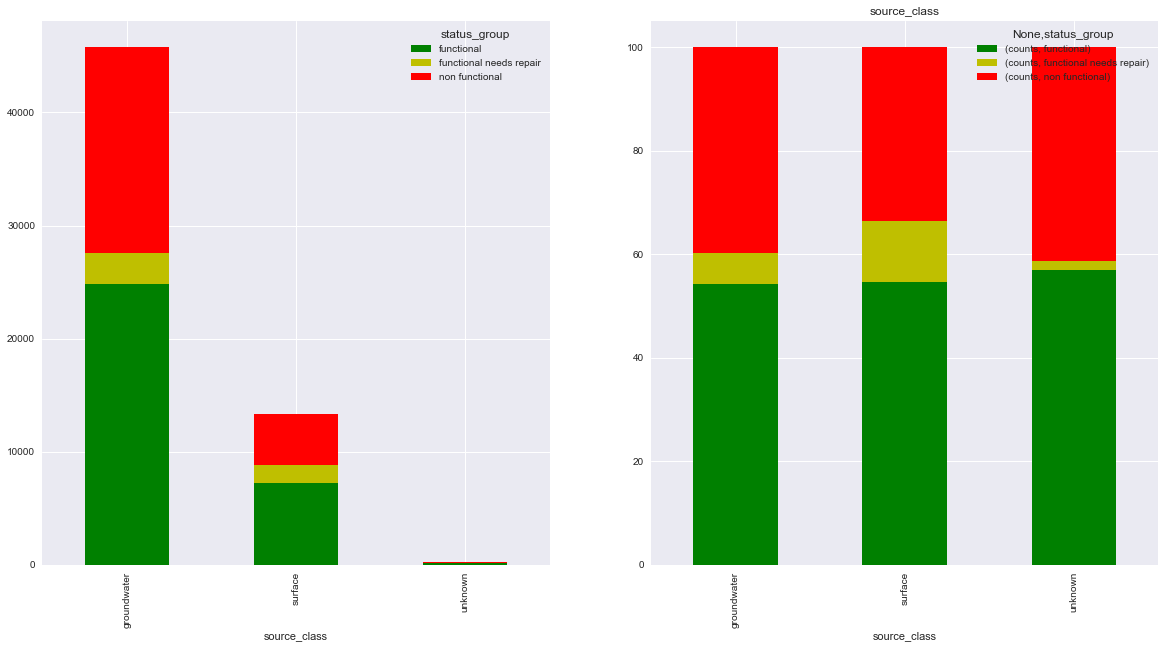

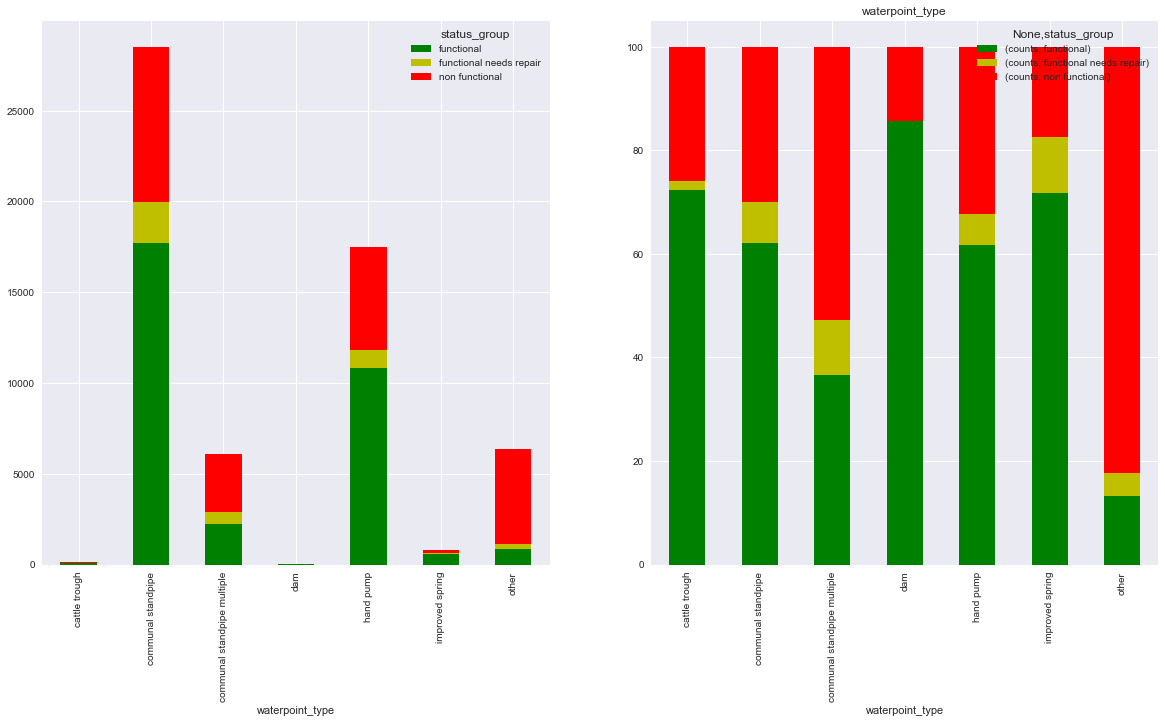

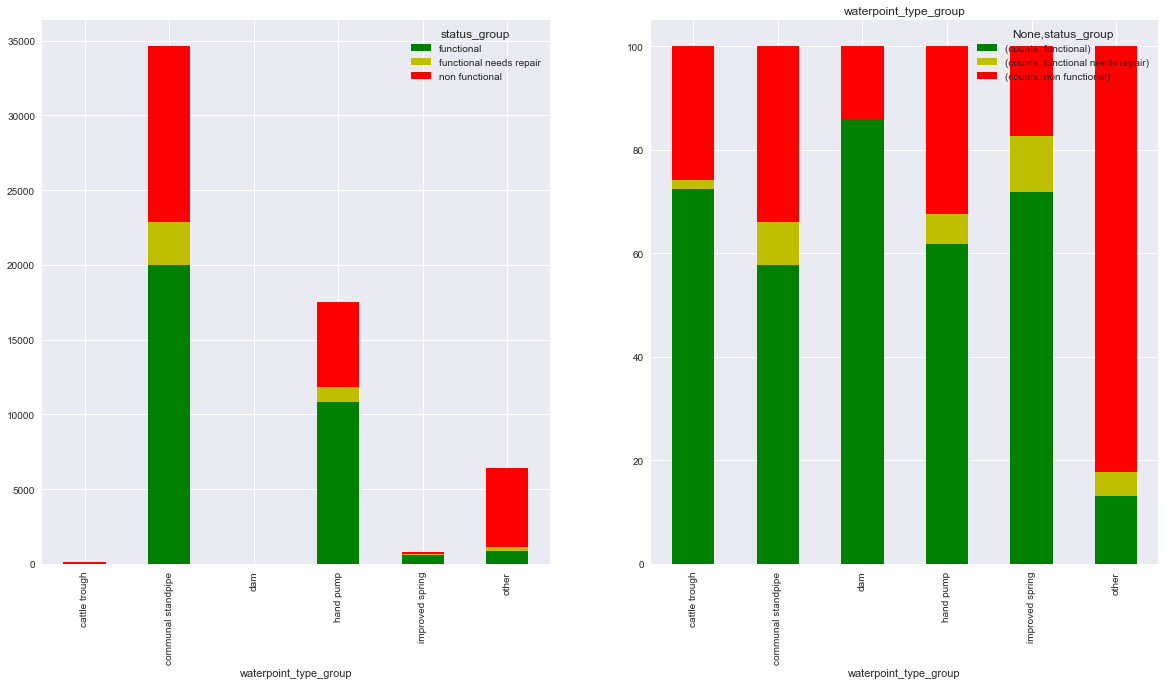

In [49]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(30,40):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')

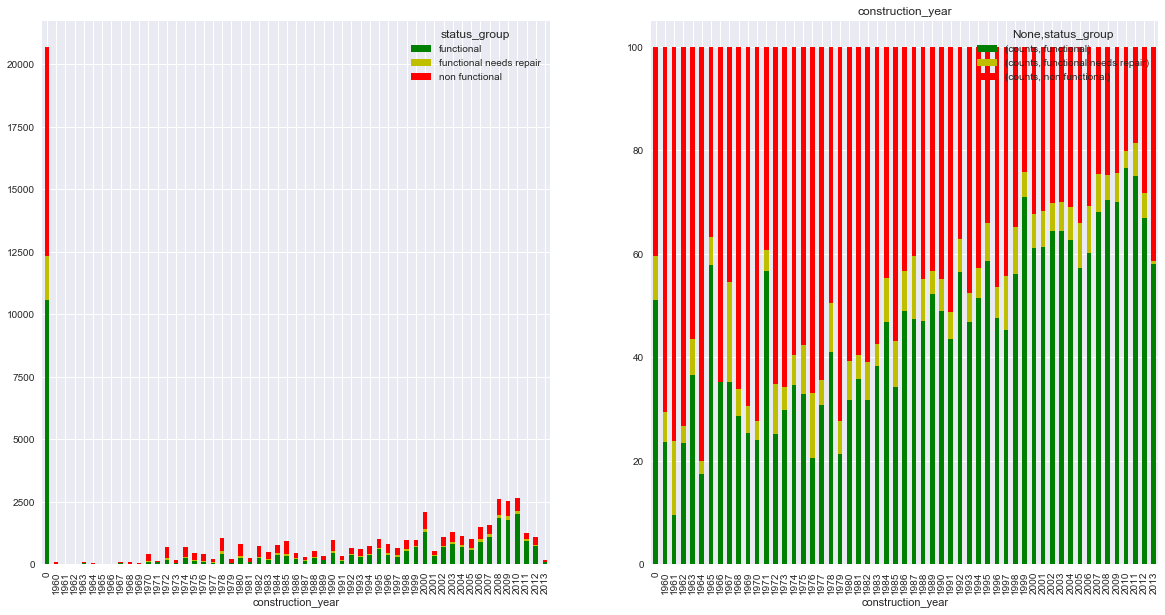

In [50]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

colors_set = ['g', 'y', 'r']
df_joined.groupby([df_joined.columns[23], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
plt.title(df_joined.columns[23])

month_year = df_joined.groupby([df_joined.columns[23],'status_group']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
fig.savefig('constructionyr.png')

(-120, 3000)

(0, 70)

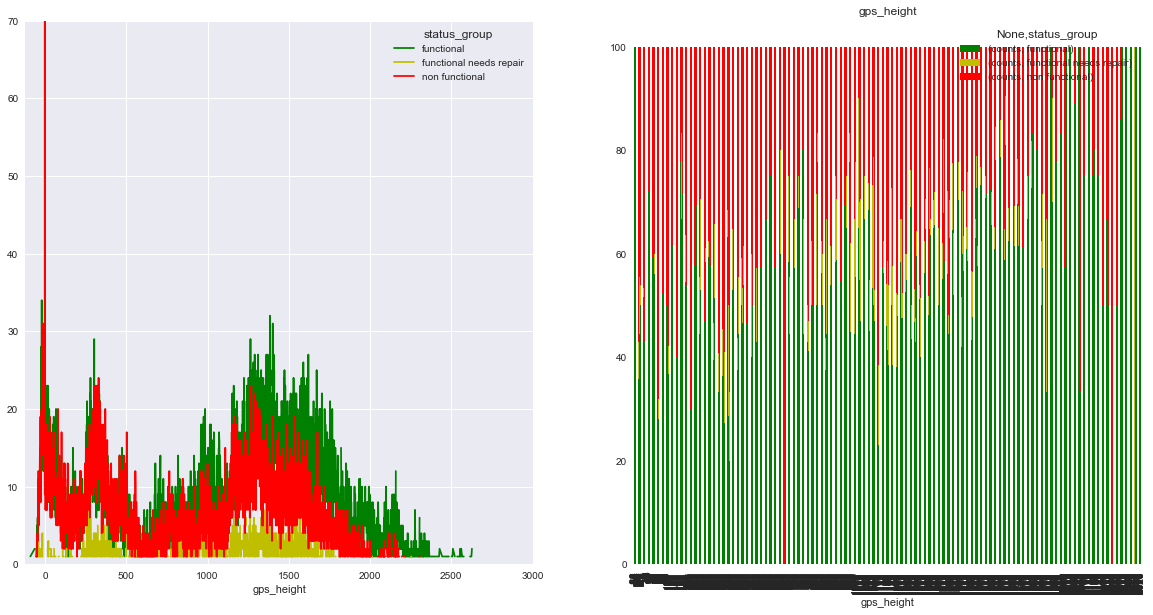

In [51]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

colors_set = ['g', 'y', 'r']

df_joined.groupby([df_joined.columns[4], 'status_group']).size().unstack().plot(kind='line', stacked=False, color = colors_set,ax=ax1,figsize=(10,10))

ax1.set_xlim(-120, 3000)
ax1.set_ylim(0,70)
plt.title(df_joined.columns[4])

month_year = df_joined.groupby([df_joined.columns[4],'status_group']).agg({'counts': 'sum'})

# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
fig.savefig('gps_heights.png')

(0, 2000)

(0, 50)

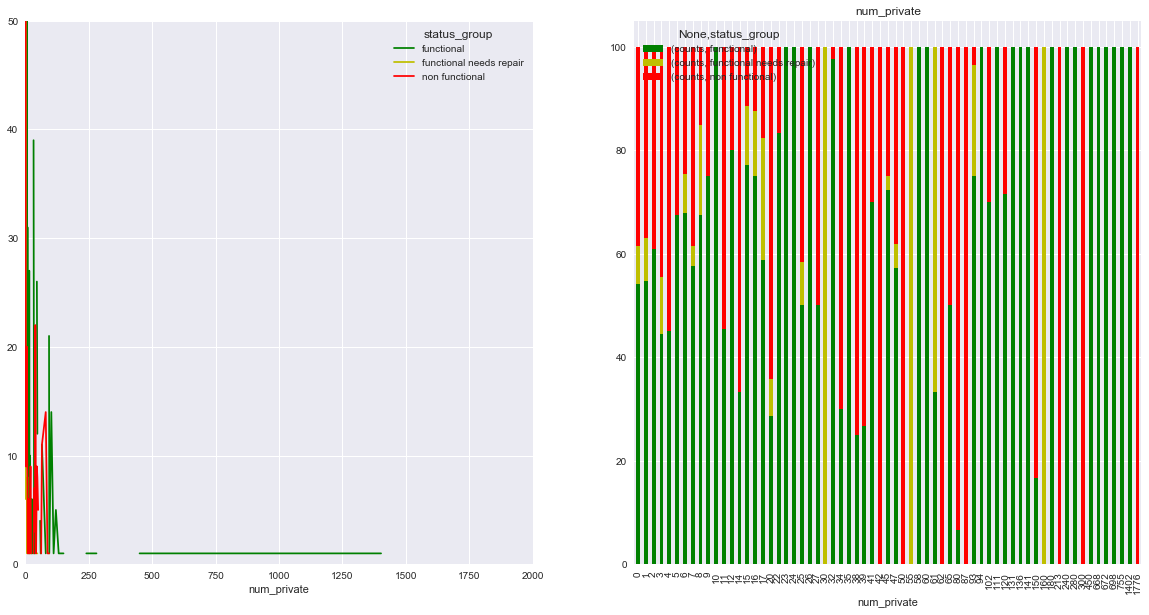

In [52]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

colors_set = ['g', 'y', 'r']

df_joined.groupby([df_joined.columns[9], 'status_group']).size().unstack().plot(kind='line', stacked=False, color = colors_set,ax=ax1,figsize=(10,10))

ax1.set_xlim(0, 2000)
ax1.set_ylim(0,50)
plt.title(df_joined.columns[9])

month_year = df_joined.groupby([df_joined.columns[9],'status_group']).agg({'counts': 'sum'})

# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
fig.savefig('num_private.png')

3

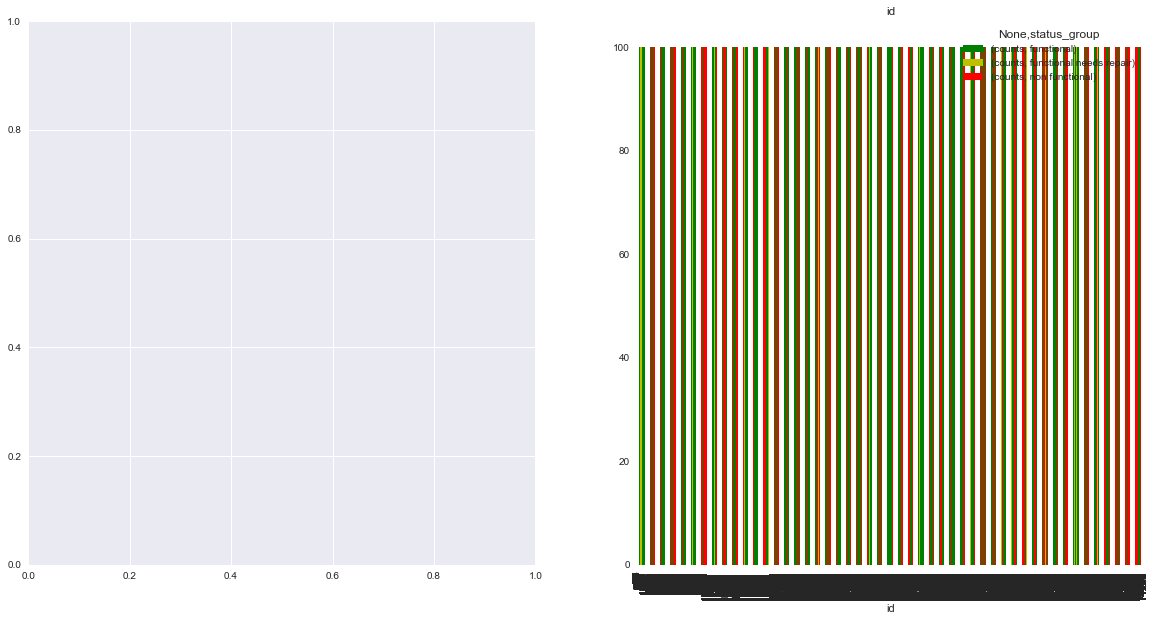

In [53]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))
3

plt.title(df_joined.columns[0])

month_year = df_joined.groupby([df_joined.columns[0],'status_group']).agg({'counts': 'sum'})

# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
fig.savefig('id.png')

In [55]:
df3=df_joined.copy()

In [23]:
df3.num_private.describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [56]:
df3.shape

(59400, 42)

In [57]:
df3[df3.columns[40]] = df3[df3.columns[40]].astype('category')
cat_name = df3.columns[40] +'_cat'
df3[cat_name] = df3[df3.columns[40]].cat.codes

In [7]:
df3.head(2)

id  amount_tsh date_recorded   funder  gps_height installer  longitude  \
0  69572      6000.0       3/14/11    Roman        1390     Roman  34.938093   
1   8776         0.0        3/6/13  Grumeti        1399   GRUMETI  34.698766   

   latitude  wpt_name  num_private       ...             quantity  \
0 -9.856322      none            0       ...               enough   
1 -2.147466  Zahanati            0       ...         insufficient   

  quantity_group                source           source_type  source_class  \
0         enough                spring                spring   groundwater   
1   insufficient  rainwater harvesting  rainwater harvesting       surface   

      waterpoint_type waterpoint_type_group  status_group counts  \
0  communal standpipe    communal standpipe    functional      1   
1  communal standpipe    communal standpipe    functional      1   

  status_group_cat  
0                0  
1                0  

[2 rows x 43 columns]

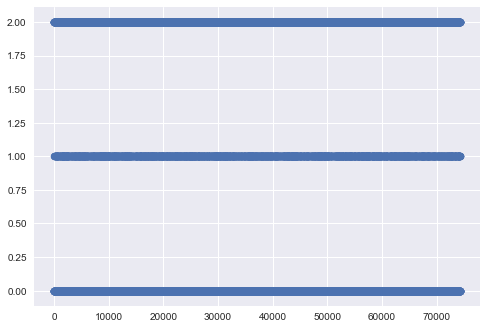

In [59]:
import numpy as np
import matplotlib.pyplot as plt


colors_set = ['g', 'y', 'r']

plt.scatter(df3.id, df3.status_group_cat)
fig.savefig('id_cat.png')

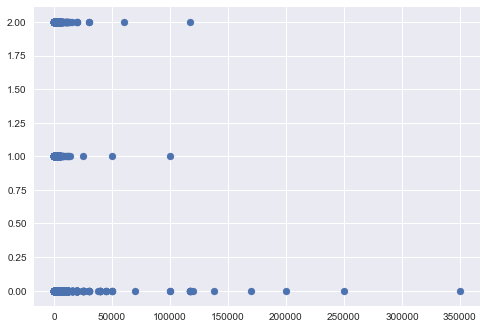

In [60]:
import numpy as np
import matplotlib.pyplot as plt


colors_set = ['g', 'y', 'r']

plt.scatter(df3.amount_tsh, df3.status_group_cat)
fig.savefig('amt_cat.png')

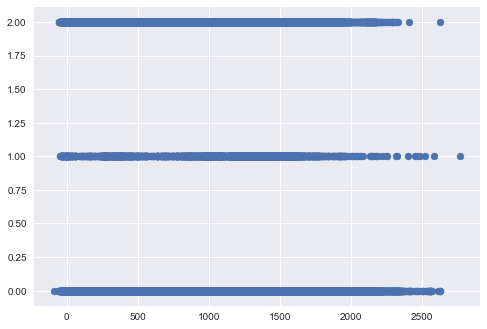

In [61]:
import numpy as np
import matplotlib.pyplot as plt


colors_set = ['g', 'y', 'r']

plt.scatter(df3.gps_height, df3.status_group_cat)
fig.savefig('gps_height.png')

In [62]:
df3['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [63]:
df3['status_group_cat'].value_counts()

0    32259
2    22824
1     4317
Name: status_group_cat, dtype: int64

In [10]:
df_joined.head(2)

id  amount_tsh date_recorded   funder  gps_height installer  longitude  \
0  69572      6000.0       3/14/11    Roman        1390     Roman  34.938093   
1   8776         0.0        3/6/13  Grumeti        1399   GRUMETI  34.698766   

   latitude  wpt_name  num_private  ...   quality_group      quantity  \
0 -9.856322      none            0  ...            good        enough   
1 -2.147466  Zahanati            0  ...            good  insufficient   

  quantity_group                source           source_type source_class  \
0         enough                spring                spring  groundwater   
1   insufficient  rainwater harvesting  rainwater harvesting      surface   

      waterpoint_type  waterpoint_type_group status_group counts  
0  communal standpipe     communal standpipe   functional      1  
1  communal standpipe     communal standpipe   functional      1  

[2 rows x 42 columns]